# <center>Analiza skupień rynku nieruchomości w Warszawie na podstawie danych z ogłoszeń sprzedaży mieszkań </center>


<h4><div style="text-align: center;">
    Adrian Siwek, 223296<br>
    Mateusz Pszczółkowski, 223315<br>
    Kamil Pracki, 223510<br>
    Emilia Śliwka, 223624<br>
    Jakub Orchowski, 223281<br>
</div></h4>


<ol>
  <h2><li>Streszczenie</li></h2>
  <p>
  W projekcie przeprowadzono analizę skupień rynku nieruchomości w Warszawie. Analiza przeprowadzona została na podstawie danych z ogłoszeń sprzedaży mieszkań, na podstawie ośmiu cech: powierzchni, odległości od metra, roku wybudowania, posiadania parkingu, piętra, stanu nowości, ceny oraz ceny za metr kwadratowy. Użyte zostały dwie metody analizy skupień: metoda k-średnich oraz metody DBSCAN. 

Celem analizy było zidentyfikowanie grup podobnych ofert sprzedaży mieszkań w Warszawie, zrozumienie struktury rynku nieruchomości oraz wykrycie ukrytych wzorców i zależności pomiędzy cechami mieszkań, co może pomóc w lepszym zrozumieniu tego rynku. 
  </p>
  <h2><li>Słowa kluczowe</li></h2>
  <ul>
    <li>Mieszkania</li>
    <li>Nieruchomości</li>
    <li>Klasteryzacja</li>
    <li>Analiza skupień</li>
    <li>DBSCAN</li>
    <li>K-średnich</li>
  </ul>
  <h2><li>Wprowadzenie</li></h2>
  <p>
  Rynek nieruchomości w Warszawie jest jednym z najbardziej dynamicznych i złożonych w Polsce. Dzięki wieloletniemu zwiększaniu się ilości mieszkańców oraz popularności stolicy jako miejsca pracy i nauki, obserwujemy ciągły popyt na mieszkania. 
    Popularność miasta przyciąga również inwestorów, którzy taktują nieruchomości jako atrakcyjną formę lokowania kapitału.  Warszawski rynek nieruchomości charakteryzują jednak najwyższe ceny w Polsce, co wraz z bardzo dużą różnorodnością ofert stanowi dodatkowe wyzwanie dla osób szukających dla siebie odpowiedniego mieszkania. Dodatkowo Warszawa przyciąga do siebie faktem, że jako jedyne miasto w Polsce posiada linie metra, co znacząco uatrakcyjnia konkretne lokalizacje i jednocześnie wpływają na ceny mieszkań.  
  </p>
  <h2><li>
    Przedmiot badania</h2>
    <ol type="a">
      <h3><li>Cel i zakres badania</h3>
        <p>Celem badania jest przeprowadzenie analizy rynku nieruchomości w Warszawie. Zastosowane zostaną dwie metody analizy skupień: K-średnich i DBSCAN. Pozwoli to na zidentyfikowanie grup podobnych ofert, co umożliwi lepsze zrozumienie badanego rynku oraz ułatwi wskazanie ukrytych zależności pomiędzy wybranymi cechami mieszkań. Zakres badania obejmuje dane z 10000 ofert sprzedaży mieszkań znajdujących się w Warszawie oraz jej obrzeżach, dostępnych w Internecie w dniu 20.03.2024 .</p>
      </li>
      <h3><li>Zmienne wybrane do analizy</h3>
        <ol type="I">
            <h4><li>Powierzchnia</li></h4>
                <ul>
                    <li>Opis: Całkowita przestrzeń, którą oferuje dana nieruchomość (w m²).</li>
                    <li>Uzasadnienie: Duża powierzchnia zazwyczaj jest uznawana za atrakcyjną. Większe mieszkania są pożądane, ponieważ oferują więcej przestrzeni. </li>
                    <li>Podział: Stymulant – im większa powierzchnia tym więcej przestrzeni do życia </li>                
                </ul>
            <h4><li>Odległość od metra</li></h4>
                <ul>
                    <li>Opis: Odległość mieszkania od najbliższej stacji metra (w m) </li>
                    <li>Uzasadnienie: Mieszkania w bliskiej odległości od stacji metra są bardziej atrakcyjne, ponieważ są najszybszym środkiem transportu do wielu części miasta </li>
                    <li>Podział: Destymulant- im mniejsza odległość od metra tym lepsza komunikacja z innymi częściami miasta </li>
                </ul>      
            <h4><li>Rok wybudowania </li></h4>
                <ul>
                    <li>Opis: Rok, w którym budynek, w którym znajduje się mieszkanie został wybudowany. </li>
                    <li>Uzasadnienie: Nowsze budynki zazwyczaj oferują lepszy stan techniczny mieszkania </li>
                    <li>Podział: późniejsza data wybudowania zazwyczaj oznacza lepszy stan mieszkania. </li>
                </ul>    
            <h4><li>Czy posiada parking </li></h4>
                <ul>
                    <li>Opis: Informacja, czy do mieszkania należy miejsce parkingowe lub garaż. </li>
                    <li>Uzasadnienie: Własne miejsce parkingowe zwiększa komfort dla osób posiadających samochód. </li>
                    <li>Podział:  Stymulant- posiadanie miejsca parkingowego zwiększa wygodę</li>
                </ul>    
            <h4><li>Piętro </li></h4>
                <ul>
                    <li>Opis: Piętro, na którym znajduje się mieszkanie </li>
                    <li>Uzasadnienie: Mieszkania na wyższych piętrach zazwyczaj zapewniają większą prywatność, ciszę oraz lepszy widok. </li>
                    <li>Podział: Stymulant – im wyższe piętro tym większy komfort </li>
                </ul>     
            <h4><li>Czy jest nowe </li></h4>
                <ul>
                    <li>Opis: Informacja czy mieszkanie było wcześniej użytkowane</li>
                    <li>Uzasadnienie: Nowe mieszkania są postrzegane jako bardziej atrakcyjne, ponieważ nie wymagają remontów, a ich stan techniczny jest lepszy.</li>
                    <li>Podział: Stymulant - nowe mieszkania są bardziej atrakcyjne, ponieważ są w dobrym stanie technicznym i nie wymagają dodatkowych inwestycji.</li>
                </ul>    
            <h4><li>Cena</li></h4>
                <ul>
                    <li>Opis: Kwota, którą trzeba zapłacić za nieruchomość</li>
                    <li>Uzasadnienie: Cena jest jednym z najważniejszych czynników przy zakupie mieszkania. Mieszkanie o zbyt wysokiej cenie mogą odstraszać klientów</li>
                    <li>Podział: Destymulant - wyższa cena zniechęca do zakupu, zwłaszcza gdy nie ma ona uzasadnienia</li>
                </ul>    
            <h4><li>Cena za metr kwadratowy </li></h4>
                <ul>
                    <li>Opis: Cena mieszkania w przeliczeniu na metr kwadratowy</li>
                    <li>Uzasadnienie: Cena za metr kwadratowy daje informację o tym, czy mieszkanie jest drogie, czy tanie w stosunku do powierzchni.</li>
                    <li>Podział: Destymulant – za wysoka cena za m² może sprawić, że mieszkanie będzie mało opłacalne</li>
                </ul>    
        </ol>
      </li>
    </ol>
  </li>
</ol>



In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mpl
import json

with open("parsed.json", "r", encoding='UTF-8') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df[["latitude", "longitude"]] = df["location"].apply(pd.Series)
df.drop(columns=["location"], inplace=True)
df.rename(columns={"area":"powierzchnia", "distance_to_metro": "odl_od_metra", "build_year": "rok_budowy",
                    "has_parking":"parking", "floor":"piętro","is_new":"budownictwo", "price":"cena", 
                    "price_m2":"cena_m2", "date_added":"data_dodania", "latitude": "szer. geograficzna", "longitude": "wys. geograficzna"}, inplace=True)
df

,powierzchnia,odl_od_metra,rok_budowy,parking,piętro,budownictwo,cena,cena_m2,data_dodania,szer. geograficzna,wys. geograficzna
0,133.00,8793.806144,2023.0,True,0,False,1075000.0,8082.71,None,52.237000,20.781200
1,56.00,14444.384654,NaN,True,2,False,725000.0,12946.43,None,52.226650,21.252710
2,60.00,7790.755856,2024.0,True,0,True,820000.0,13666.67,None,52.363506,21.025740
3,130.84,4281.306863,2025.0,True,0,True,1390000.0,10623.66,None,52.106000,21.018577
4,50.00,539.849235,1977.0,False,4,False,775000.0,15500.00,None,52.237038,20.935803
...,...,...,...,...,...,...,...,...,...,...,...
10053,197.46,478.316283,2004.0,False,6,False,3790000.0,19193.76,None,52.237250,20.999890
10054,96.30,478.316283,2004.0,True,5,False,2215000.0,23001.04,None,52.237250,20.999890
10055,55.00,511.467699,2002.0,True,4,False,964000.0,17527.27,None,52.145432,21.056216
10056,69.00,511.467699,2002.0,True,6,False,1380000.0,20000.00,None,52.145432,21.056216


#### <center>ilość wartości null w danej kolumnie</center>

In [3]:
df.isnull().sum()

powierzchnia              0
odl_od_metra              0
rok_budowy              706
parking                   0
piętro                    0
budownictwo               0
cena                      0
cena_m2                   0
data_dodania          10058
szer. geograficzna        0
wys. geograficzna         0
dtype: int64

                                            Ilość wartości null procentowo

In [4]:
df.isnull().sum()/df.shape[0]*100

powierzchnia            0.000000
odl_od_metra            0.000000
rok_budowy              7.019288
parking                 0.000000
piętro                  0.000000
budownictwo             0.000000
cena                    0.000000
cena_m2                 0.000000
data_dodania          100.000000
szer. geograficzna      0.000000
wys. geograficzna       0.000000
dtype: float64

#### <center>Typy zmiennych</center>

In [5]:
df.dtypes

powierzchnia          float64
odl_od_metra          float64
rok_budowy            float64
parking                  bool
piętro                  int64
budownictwo              bool
cena                  float64
cena_m2               float64
data_dodania           object
szer. geograficzna    float64
wys. geograficzna     float64
dtype: object

#### <center>Zamiana wartości kolumny "odl_od_metra" z metrów na kilometry</center>

In [6]:
df["odl_od_metra"] = df["odl_od_metra"].apply(lambda x: round(x/1000, 3))
df

,powierzchnia,odl_od_metra,rok_budowy,parking,piętro,budownictwo,cena,cena_m2,data_dodania,szer. geograficzna,wys. geograficzna
0,133.00,8.794,2023.0,True,0,False,1075000.0,8082.71,None,52.237000,20.781200
1,56.00,14.444,NaN,True,2,False,725000.0,12946.43,None,52.226650,21.252710
2,60.00,7.791,2024.0,True,0,True,820000.0,13666.67,None,52.363506,21.025740
3,130.84,4.281,2025.0,True,0,True,1390000.0,10623.66,None,52.106000,21.018577
4,50.00,0.540,1977.0,False,4,False,775000.0,15500.00,None,52.237038,20.935803
...,...,...,...,...,...,...,...,...,...,...,...
10053,197.46,0.478,2004.0,False,6,False,3790000.0,19193.76,None,52.237250,20.999890
10054,96.30,0.478,2004.0,True,5,False,2215000.0,23001.04,None,52.237250,20.999890
10055,55.00,0.511,2002.0,True,4,False,964000.0,17527.27,None,52.145432,21.056216
10056,69.00,0.511,2002.0,True,6,False,1380000.0,20000.00,None,52.145432,21.056216


<ol>
    <ol type="a" start = "4">
        <h3><li>Wstępna analiza danych</li></h3>
            <ol type="I">
                <h4><li>statystyki opisowe (przynajmniej: średnia, mediana, minimum, maksimum, odchylenie standardowe, skośność)</li></h4>
                    <ul>
                    <center><h4>Aby lepiej zrozumieć rozkład danych i znaleźć ewentualne wzorce, obliczone zostały podstawowe statystyki opisowe. Ponieważ zmienne posiadają różne typy, statystyki dla poszczególnych typów są różne.</h4></center><br>
                        <center><h4>Dla wartosci numerycznych</h4></center>
                        <li>Średnia: Wartość, która informuje nas o przeciętnym poziomie danej zmiennej w zbiorze danych. Przykładowo średnią cenę za metr kwadratowy w Warszawie, która daje punkt odniesienie przy wyborze mieszkania </li>
                        <li>Mediana: Wartość środkowa w uporządkowanym zbiorze danych, która dzieli dane na dwie równe części. Jest lepszym wyborem niż średnia, gdy dane mogą być zniekształcone przez wartości skrajne. Przykładowo średnia ceny może być zniekształcona przez bardzo duże mieszkania </li>
                        <li>Minimum: Najniższa wartość w zbiorze danych </li>
                        <li>Maksimum: Najwyższa wartość w zbiorze danych</li>
                        <li>Odchylenie standardowe: Miara rozproszenia danych wokół średniej. Może ona pokazać czy na przykład ceny za metr kwadratowy w mieście są zróżnicowane czy zbliżone do siebie. </li>
                        <li>Skośność: Mierzy asymetrię rozkładu danych, wskazując, czy dane są bardziej skupione po jednej stronie średniej. Przykładowo pokazuje czy powierzchnia większości mieszkań jest większa czy mniejsza od średniej. </li>
                        <center><h4>Dla wartości typu boolean (prawda lub fałsz) </h4></center>
                        <li>Procentowe rozkłady wartości: Pokazuje jaka część danych w zbiorze ma wartość “Prawda”, a jaką wartość “Fałsz”. Przykładowo obrazuje to jaki procent mieszkań wystawioncych na sprzedaż jest nowych.</li>
                    </ul>
            </ol>
    </ol>
</ol

In [7]:

statystyki = df.describe().loc[["mean", "min", "max", "std"]]

statystyki.loc["median"] = df.median()
statystyki.loc["skew"] = df.skew()

statystyki = statystyki.apply(lambda x: round(x, 3)).rename(index={
    "mean": "srednia",
    "min": "minimalna",
    "max": "maksymalna",
    "std": "odchylenie_standardowe",
    "median": "mediana",
    "skew": "skośność"
})


statystyki

,powierzchnia,odl_od_metra,rok_budowy,piętro,cena,cena_m2,szer. geograficzna,wys. geograficzna
srednia,60.039,2.219,1995.803,3.193,1.155377e+06,18872.345,52.229,21.008
minimalna,14.530,0.001,1820.000,-1.000,7.820000e+02,13.030,52.106,20.781
maksymalna,1892.030,14.568,2027.000,45.000,1.700000e+07,170000.000,52.364,21.253
odchylenie_standardowe,36.656,2.096,29.282,3.127,9.496621e+05,6421.052,0.046,0.067
mediana,52.440,1.551,2006.000,2.000,8.740625e+05,17526.320,52.229,21.009
skośność,14.346,1.760,-0.885,2.538,5.235000e+00,3.649,0.374,0.275


<ol>
    <ol type="a" start = "4">
            <ol type="I" start = "2">
                <h4><li>Braki danych: Usunięte zostały rekordy posiadające braki danych</li></h4>
            </ol>
    </ol>
</ol

In [8]:

df.drop(columns=["cena","data_dodania"], axis=1, inplace=True)  # Usunięcie zbędnych kolumn
df.dropna(how="any", inplace=True) #usuniecie rekordów nie posiadających danych o roku budowy

<ol>
    <ol type="a" start = "4">
            <ol type="I" start = "3">
                <h4><li>obserwacje odstające i w jaki sposób je obsłużono 
                Dane znacząco odstające od średnich wartości zostały usunięte i nie były poddawane analizie. </li></h4>
                <h4><li>Podstawowa wizualizacja: </h4></li>
            </ol>
    </ol>
</ol

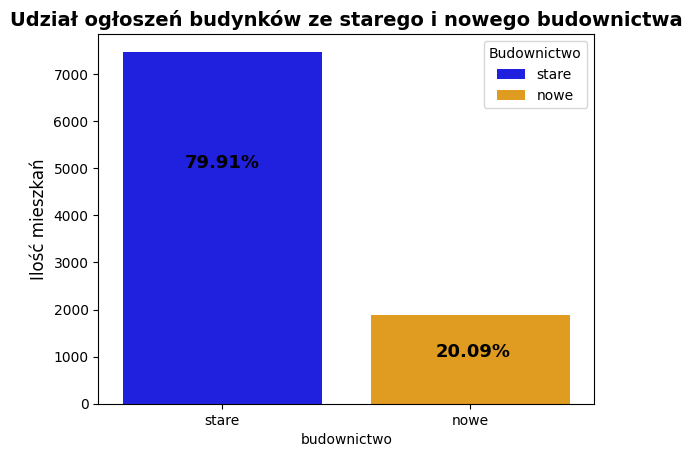

In [9]:
sns.countplot(x = df["budownictwo"], hue = df.budownictwo, palette=["blue", "orange"])

mpl.text(-0.15, 5000, s = f"{round(df[df["budownictwo"] == False].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')

mpl.text(0.86, 1000, s = f"{round(df[df["budownictwo"] == True].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')

mpl.legend(title = "Budownictwo",labels = ["stare", "nowe"])

mpl.title("Udział ogłoszeń budynków ze starego i nowego budownictwa", fontsize=14, weight='bold')
mpl.ylabel("Ilość mieszkań", fontsize=12)
mpl.xticks(ticks=[0, 1], labels=["stare", "nowe"])
mpl.show()


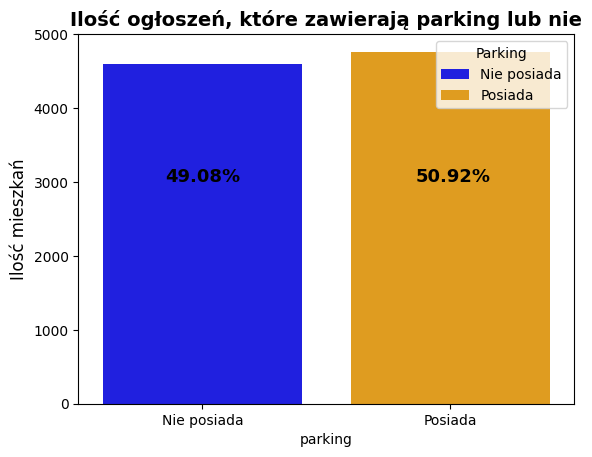

In [10]:
sns.countplot(x = df["parking"], hue = df.parking, palette=["blue", "orange"])

mpl.text(-0.15, 3000, s = f"{round(df[df["parking"] == False].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')

mpl.text(0.86, 3000, s = f"{round(df[df["parking"] == True].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')

mpl.legend(title = "Parking",labels = ["Nie posiada", "Posiada"])

mpl.title("Ilość ogłoszeń, które zawierają parking lub nie", fontsize=14, weight='bold')
mpl.ylabel("Ilość mieszkań", fontsize=12)
mpl.xticks(ticks=[0, 1], labels=["Nie posiada", "Posiada"])
mpl.show()

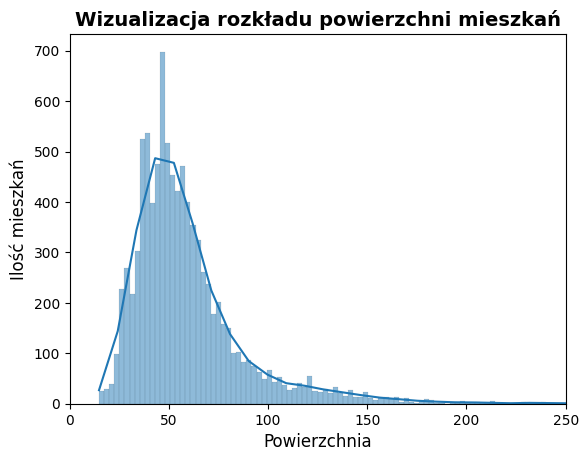

In [11]:
sns.histplot(x= df.powierzchnia, kde = True)
mpl.xlim(0,250)
mpl.title("Wizualizacja rozkładu powierzchni mieszkań", fontsize=14, weight='bold')
mpl.xlabel("Powierzchnia", fontsize=12)
mpl.ylabel("Ilość mieszkań", fontsize=12)
mpl.show()

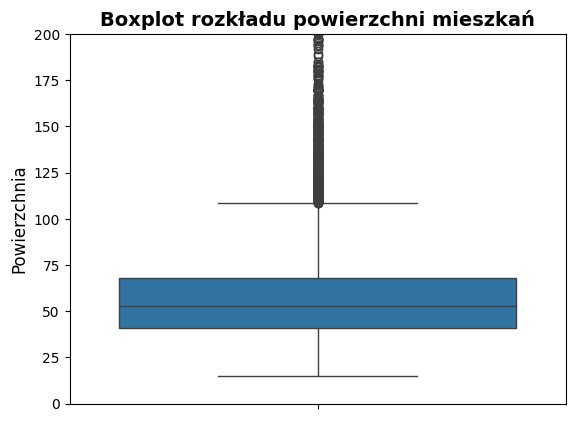

In [12]:
sns.boxplot(y = df["powierzchnia"])
mpl.ylim(0,200)

mpl.title("Boxplot rozkładu powierzchni mieszkań", fontsize=14, weight='bold')
mpl.ylabel("Powierzchnia", fontsize=12)
mpl.show()

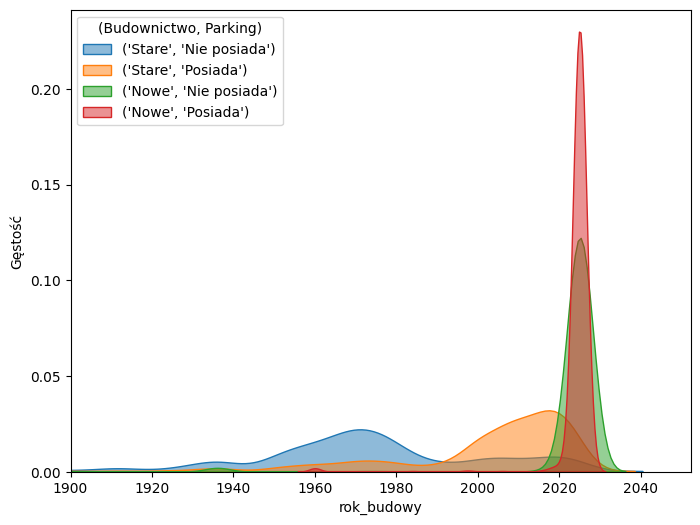

In [13]:
mpl.figure(figsize=(8, 6))

subsets = [(False,False),(False,True),(True,False),(True,True)]  #(budownictwo val, parking val )

for val1,val2 in subsets:
    subset = df[(df["budownictwo"] == val1) & (df["parking"] == val2)]
    sns.kdeplot(subset["rok_budowy"], label=f"{ "Nowe" if val1 == 1 else "Stare", "Posiada" if val2 == 1 else "Nie posiada"}", fill=True, alpha =.5)
    
mpl.legend(title = "(Budownictwo, Parking)")
mpl.xlim(1900,)
mpl.ylabel("Gęstość")
#price_m2 i area nie dają tutaj ciekawych wniosków
mpl.show()

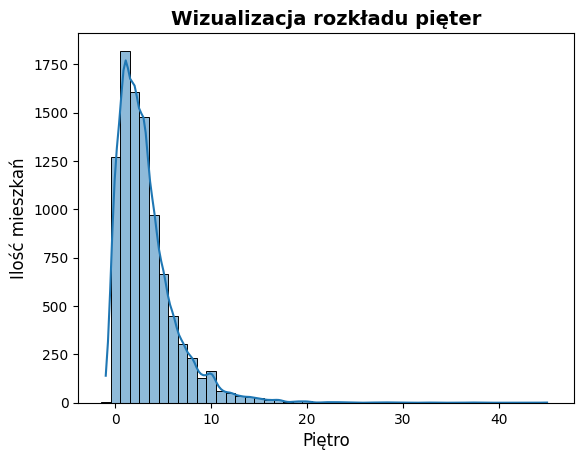

In [14]:
sns.histplot(x = df["piętro"], kde=True, discrete=True)

mpl.title("Wizualizacja rozkładu pięter", fontsize=14, weight='bold')
mpl.xlabel("Piętro", fontsize=12)
mpl.ylabel("Ilość mieszkań", fontsize=12)
mpl.show()

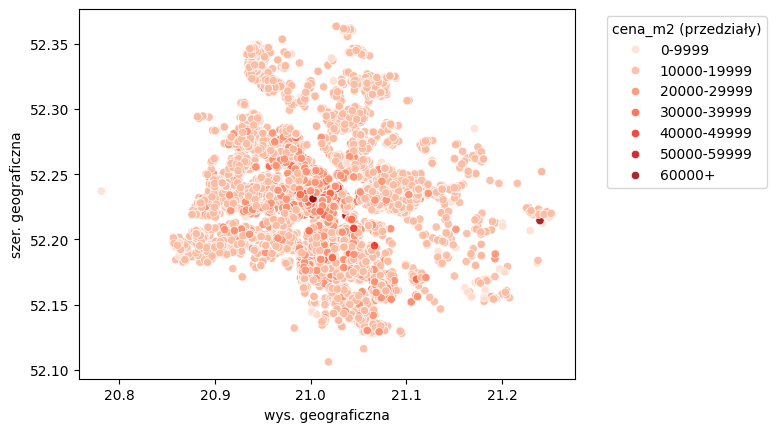

In [15]:

bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, df["cena_m2"].max()]
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-2)] + ["60000+"]

df_vis = df.copy(deep=True)
df_vis["cena_m2_bin"] = pd.cut(df_vis["cena_m2"], bins=bins, labels=labels, include_lowest=True)

sns.scatterplot(
    x=df_vis["wys. geograficzna"],
    y=df_vis["szer. geograficzna"],
    hue=df_vis["cena_m2_bin"],
    alpha=0.9,
    palette="Reds", 
)

mpl.legend(title="cena_m2 (przedziały)", bbox_to_anchor=(1.05, 1), loc='upper left')
mpl.show()


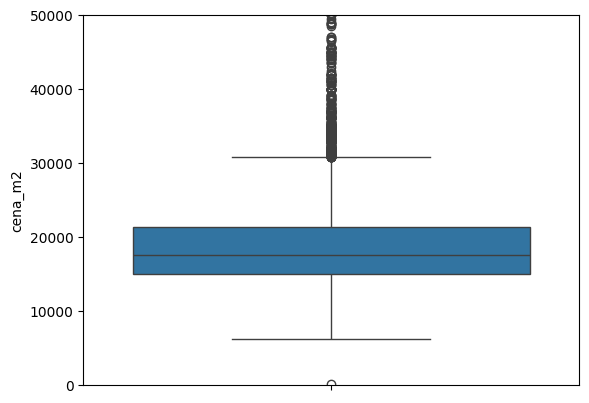

In [16]:
sns.boxplot(y = df["cena_m2"])
mpl.ylim(0,50000)
mpl.show()

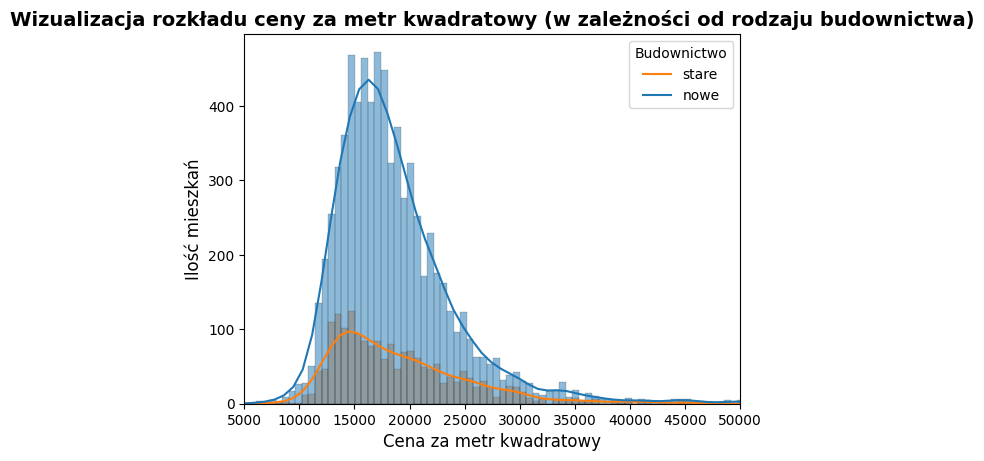

In [17]:
sns.histplot(x = df["cena_m2"], kde=True, hue=df["budownictwo"])
mpl.xlim(5000, 50000)
mpl.legend(title = "Budownictwo" , labels =["stare","nowe"])
mpl.title("Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od rodzaju budownictwa)", fontsize=14, weight='bold')
mpl.xlabel("Cena za metr kwadratowy", fontsize=12)
mpl.ylabel("Ilość mieszkań", fontsize=12)
mpl.show()

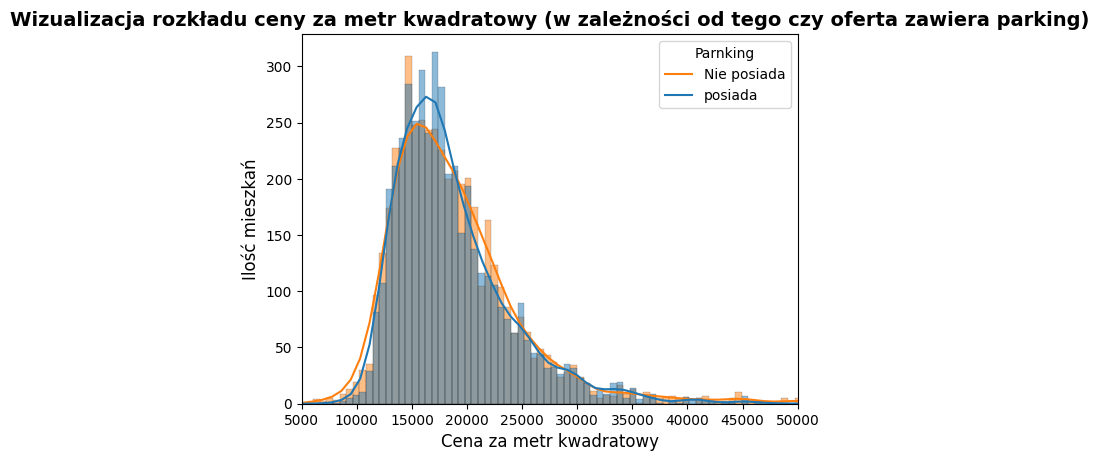

In [18]:
sns.histplot(x = df["cena_m2"], kde=True, hue=df["parking"])
mpl.xlim(5000, 50000)
mpl.legend(title = "Parnking" , labels =["Nie posiada","posiada"])
mpl.title("Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od tego czy oferta zawiera parking)", fontsize=14, weight='bold')
mpl.xlabel("Cena za metr kwadratowy", fontsize=12)
mpl.ylabel("Ilość mieszkań", fontsize=12)
mpl.show()

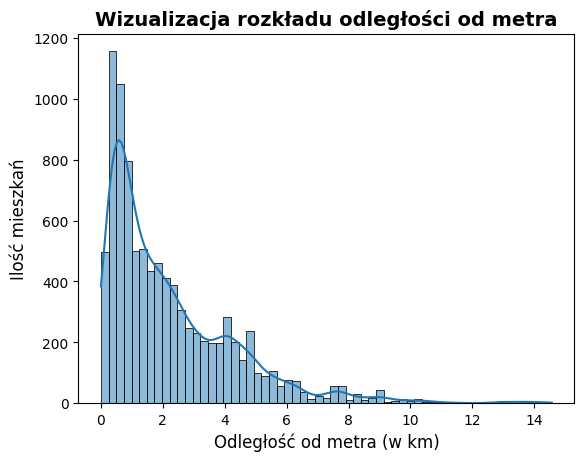

In [19]:
sns.histplot(x=df.odl_od_metra, kde=True)
mpl.title("Wizualizacja rozkładu odległości od metra", fontsize=14, weight='bold')
mpl.xlabel("Odległość od metra (w km)", fontsize=12)
mpl.ylabel("Ilość mieszkań", fontsize=12)
mpl.show()

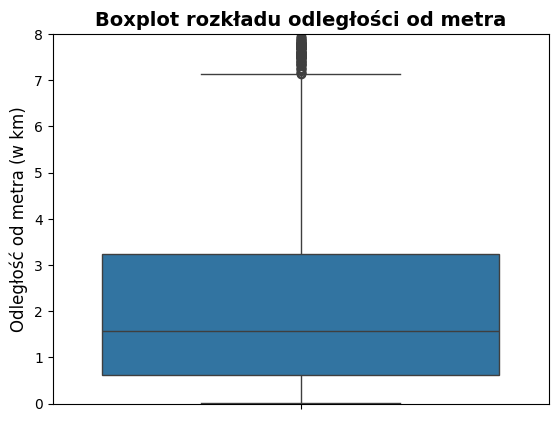

In [20]:
sns.boxplot(y = df.odl_od_metra)
mpl.ylim(0, 8)
mpl.title("Boxplot rozkładu odległości od metra", fontsize=14, weight='bold')
mpl.ylabel("Odległość od metra (w km)", fontsize=12)
mpl.show()

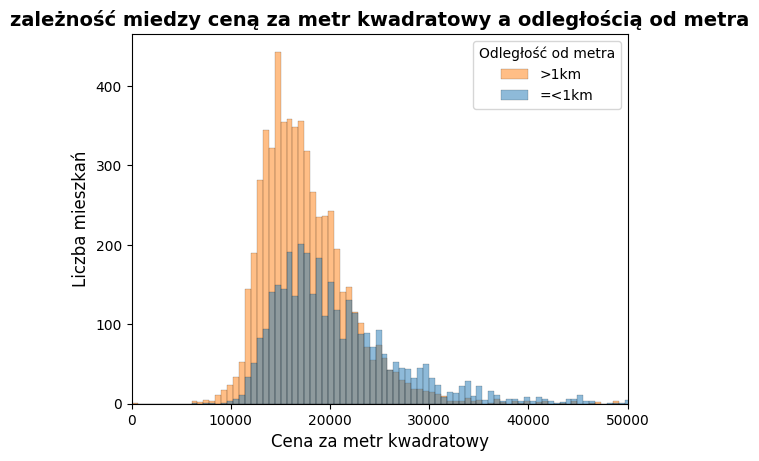

In [21]:
sns.histplot(x= df.cena_m2 ,hue = df.odl_od_metra.apply(lambda x: x > 1))
mpl.xlim(0,50000)
mpl.legend(title = "Odległość od metra",labels = [">1km", "=<1km"])

mpl.title("zależność miedzy ceną za metr kwadratowy a odległością od metra", fontsize=14, weight='bold')
mpl.xlabel("Cena za metr kwadratowy", fontsize=12)
mpl.ylabel("Liczba mieszkań", fontsize=12)
mpl.show()

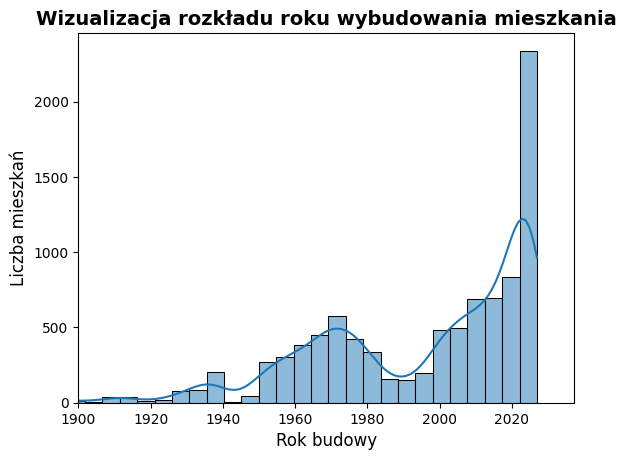

In [22]:
sns.histplot(x = df.rok_budowy, kde = True)
mpl.xlim(1900,)
mpl.title("Wizualizacja rozkładu roku wybudowania mieszkania", fontsize=14, weight='bold')
mpl.xlabel("Rok budowy", fontsize=12)
mpl.ylabel("Liczba mieszkań", fontsize=12)
mpl.show()

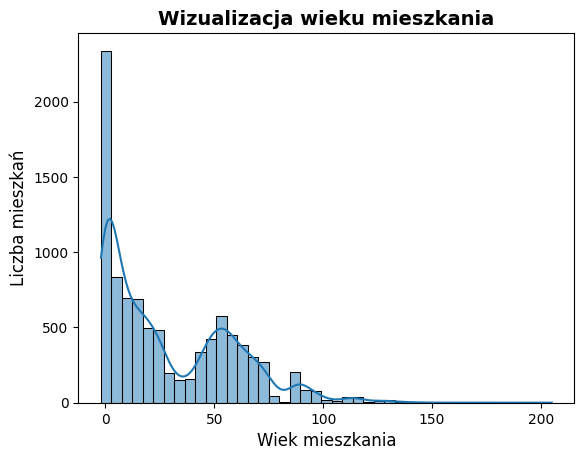

In [23]:
sns.histplot( x = df["rok_budowy"].copy(deep =True).apply(lambda x: 2025-x), kde = True)
mpl.title("Wizualizacja wieku mieszkania", fontsize=14, weight='bold')
mpl.xlabel("Wiek mieszkania", fontsize=12)
mpl.ylabel("Liczba mieszkań", fontsize=12)
mpl.show()

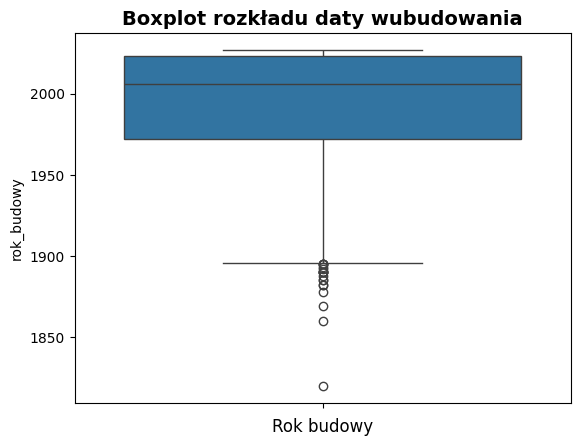

In [24]:
sns.boxplot(y = df.rok_budowy)
mpl.title("Boxplot rozkładu daty wubudowania", fontsize=14, weight='bold')
mpl.xlabel("Rok budowy", fontsize=12)
mpl.show()

<ol start="5">
    <h2><li>Opis metod</li></h2>
    <ol type="a">
        <h4><li>Metoda K-średnich</li></h4>
        <p>Algorytm K-średnich dzieli elementry na określoną ilość klas ze względu na podobieńśtwo.</p>
        <ol type="I">
            <li>Podstawowe pojęcia</li>
            <ul>
                <li>
                    <p>Parametrami wejściowymi algorytmu są: </p>
                    <ul>
                        <li>Zbiór danych</li>
                        <li>k - liczba naturalna oznaczająca ilość grup</p>
                    </ul>
                </li>
                <li>Centroid: średnia arytmetyczna wszystkich elementów należących do danej grupy. Centroidów jest tyle ile grup danych.</li>
            </ul>
            <li>Kroki algorytmu: </li><br>
            <p>Inicjalizacja: każdy element ze zbioru danych zostaje początkowo przyporządkowany do losowo wybranej z k-grup</p>
            <ul>
                <li>Krok 1: Obliczenie centroidu dla każdej z k-grup</li>
                <li>Krok 2: Przyporządkowanie każdego elementu do tej grupy, której centroid jest najbliższy wartością do danego elementu</li>
                <li>Wykonuj krok 1 oraz krok 2 do momentu, gdy zmiany w obliczeniach przestaną zachodzić</li>
            </ul>
            <li>Cytowanie pracy w której zaproponowano metodę/ewentualnie pracy w której użyto metodę: </li><br>
            <p>Pracą w której pierwszy raz zaproponowano metodę jest: " J. MacQueen (1967).Some Methods for Classification and Analysis of Multivariate Observations"</p>
        </ol>
        <h4><li>Metoda DBSCAN</li></h4>
        <p>Algorytm DBSCAN jest oparty na gęstości. Głownym celem metody jest klasteryzacja danych. Utworzonymi klastrami są obszary o dużym zagęszczeniu obiektów.</p>
        <ol type="I">
            <li>Podstawowe pojęcia</li>
            <ul>
                <li>
                    <p>Parametrami wejściowymi algorytmu są: </p>
                    <ul>
                        <li>Zbiór danych</li>
                        <li>eps (epsilon) - maksymalny promień sąsiedztwa</li>
                        <li>MinPts - minimalna liczba obiektów w eps-otoczeniu</li>
                    </ul>
                </li>
                <li>Obiekt rdzeniowy: obiekt, który ma co najmniej MinPts punktów w swoim sąsiedztwie o promieniu eps.</li>
                <li>Obiekt brzegowy: obiekt, który ma mniej niż MinPts punktów w swoim sąsiedztwie o promieniu eps.</li>
            </ul>
            <li>Kroki algorytmu: </li>
            <ul>
                <li>Wybranie dowolnego punktu p</li>
                <li>Wyszukanie zbioru wszystkich punktów, które są osiągalne z punktu p przy zadanych parametrach eps i MinPts</li>
                <li>Jeżeli p jest punktem rdzeniowym, zwróć wyszukany zbiór punktów</li>
                <li>Jeżeli p jest punktem brzegowym, wybierz inny nieodwiedzony punkt i zacznij od punktu 1</li>
                <li>Kontynuuj dopóki wszystkie punkty nie będą odwiedzone</li>
            </ul>
            <li>Cytowanie pracy w której zaproponowano metodę/ewentualnie pracy w której użyto metodę: </li><br>
            <p>Pracą w której pierwszy raz zaproponowano metodę jest: "M. Ester, H.-P. Kriegel, J. Sander, X. Xu (1996). A Density-Based
            Algorithm for Discovering Clusters in Large Spatial Databases with Noise.
            Institute for Computer Science, University of Munich. Proceedings of 2nd
            International Conference on Knowledge Discovery and Data Mining (KDD-96)"</p>
        </ol>
    </ol>
</ol>

Data Preprocessing

In [25]:

#from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

#Na podstawie uzyskanych boxpoltów:

#usunięcie rekordów zbyt oddalonych od metra
df = df[df["odl_od_metra"] < 8]
#usunięcie rekordów zbyt starych 
df = df[df["rok_budowy"] >1900]
#usunięcie rekordów o zbyt dużej powierzchni 
df = df[df["powierzchnia"] < 200]
# usunięcie rekordów o zbyt dużęj cenie za metr
df = df[df["cena_m2"] < 50000]

#usunięcie outliersów
lof = LocalOutlierFactor()
outliers = lof.fit_predict(df)
df = df[outliers == 1]  

min_max_scaler = MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)



In [26]:
df

,powierzchnia,odl_od_metra,rok_budowy,parking,piętro,budownictwo,cena_m2,szer. geograficzna,wys. geograficzna
2,60.00,7.791,2024.0,True,0,True,13666.67,52.363506,21.025740
3,130.84,4.281,2025.0,True,0,True,10623.66,52.106000,21.018577
4,50.00,0.540,1977.0,False,4,False,15500.00,52.237038,20.935803
5,65.10,4.270,1995.0,True,3,False,13056.84,52.232940,21.101800
13,43.90,4.673,2001.0,False,8,False,13895.22,52.332987,20.934653
...,...,...,...,...,...,...,...,...,...
10052,29.00,0.048,1968.0,False,4,False,16206.90,52.292110,21.047960
10054,96.30,0.478,2004.0,True,5,False,23001.04,52.237250,20.999890
10055,55.00,0.511,2002.0,True,4,False,17527.27,52.145432,21.056216
10056,69.00,0.511,2002.0,True,6,False,20000.00,52.145432,21.056216


In [27]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


In [28]:
#przeskalowany i przetworzony zbiór danych z cechami ilościowymi i jakościowymi
df_processed = df_scaled.copy(deep = True)

#przeskalowany i przetworzony zbiór danych jedynie z cechami ilościowymi 
df_processed_ncat = df_scaled.drop(columns=[col for col in df.columns if col in ["parking","budownictwo"]], axis=1)

<ol start="6">
    <h2><li>Rezultaty</li></h2>
    <ol type ="a">
        <h3><li>Metoda K-średnich</li></h3>
        <ol type="I">
        <h4><li>Obliczenie indeksów: Calinski-Harabasz, Silhouette, Davies-Bouldin , WCSS</li></h4>
        </ol>
        <p>Wyniki uzyskane z podanych miar jakości klasteryzacji pomogą nam znaleźć optymalną liczbę klastrów dla naszego zbioru danych.</p>
        <ul>
            <li>Calinski-Harabasz Score</li>
                <p>Mierzy stosunek rozdzielności klastrów (między klastrami) do ich zwartości (w obrębie klastrów),
                Im wyższy, tym lepsze klastry (bardziej zwarte i odseparowane).<p>
            <li>Silhouette Score</li>
                <p>Mierzy jak podobny jest punkt do swojego klastra w porównaniu do najbliższego innego klastra. Przyjmuje wartości od -1 do 1. Im bliżej 1 tym lepsze dopasowanie.<p>
            <li>Davies-Bouldin Score</li>
                <p>Mierzy przeciętny stosunek wewnątrzklastrowego rozrzutu do odległości międzyklastrowej. Im niższy, tym lepsze klastry.<p>
            <li>WCSS (Within-Cluster Sum of Squares) </li>
                <p>Suma kwadratów odległości punktów od centroidu klastra. Wartość maleje wraz ze wzrostem liczby klastrów. Używany do metody łokcia → dobór liczby klastrów.<p>
        </ul>
    </ol>
</ol>

In [29]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import calinski_harabasz_score, silhouette_score,davies_bouldin_score

def calculate_scores(data, labels, dict):
    dict["Calinski-Harabasz"].append(calinski_harabasz_score(X=data, labels=labels))
    dict["Silhouette"].append(silhouette_score(X=data, labels=labels))
    dict["Davies-Bouldin"].append(davies_bouldin_score(X=data, labels=labels))

In [30]:

def Kmeans_scoring_df(data: pd.DataFrame):
    
    dictionary = {"clusters":range(5,201,3), "Calinski-Harabasz":[], "Silhouette":[],"Davies-Bouldin":[], "WCSS": []}

    for clusters in dictionary["clusters"]:

        kmeans = KMeans(n_clusters= clusters, max_iter= 500,random_state=42) 

        kmeans.fit(data)
        calculate_scores(data ,kmeans.labels_, dictionary)
        dictionary["WCSS"].append(kmeans.inertia_)

    df_result = pd.DataFrame(dictionary)
    df_result.set_index("clusters", inplace=True)

    return df_result


In [32]:
Kmeans_df_results = Kmeans_scoring_df(df_processed)
Kmeans_df_results_ncat = Kmeans_scoring_df(df_processed_ncat)

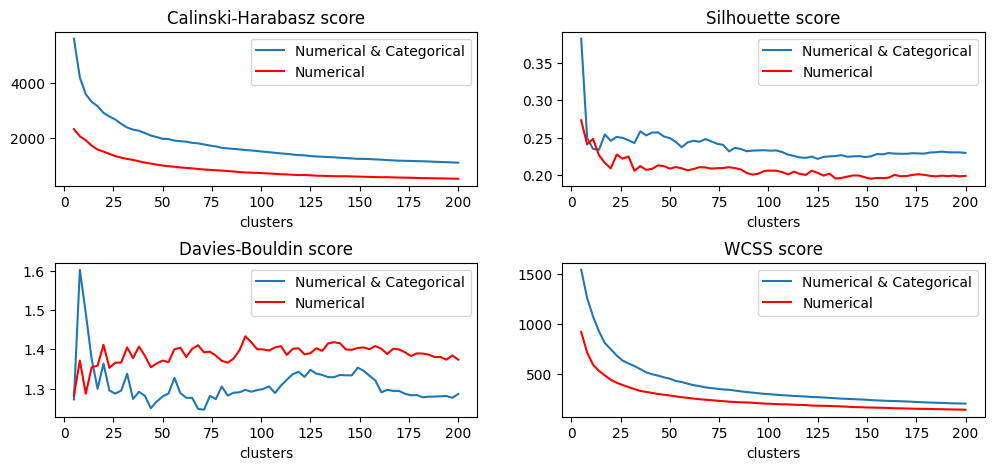

In [33]:
fig, axes = mpl.subplots(2, 2, figsize=(12, 5))

for idx, score in enumerate(Kmeans_df_results.columns):

    posx, posy = int(idx >= 2), int(idx % 2)
    
    sns.lineplot(x=Kmeans_df_results.index, y=Kmeans_df_results[score], ax=axes[posx, posy],label="Numerical & Categorical")
    sns.lineplot(x=Kmeans_df_results_ncat.index, y=Kmeans_df_results_ncat[score], ax=axes[posx, posy], color="r", label="Numerical")
    axes[posx, posy].set_ylabel("")
    axes[posx, posy].set_title(score + " score")
    
mpl.subplots_adjust(hspace=0.5)

Korzystając z metody łokcia, z wykresu "WCSS score" wynika, że optymalna liczba klastrów wynosi ~ 15. Z pozostałych metod oceny jakości klastrowania można odczytać, że ilość 15 klastrów również jest dobrym wyborem.


In [34]:
kmeans_model = KMeans(15, max_iter=500, random_state=42)
kmeans_model.fit_predict(df_processed_ncat)

array([ 7, 14, 12, ..., 14, 14,  3], shape=(8747,), dtype=int32)

In [35]:
df["Kmeans klaster"] = kmeans_model.labels_
df.head(10)

,powierzchnia,odl_od_metra,rok_budowy,parking,piętro,budownictwo,cena_m2,szer. geograficzna,wys. geograficzna,Kmeans klaster
2,60.00,7.791,2024.0,True,0,True,13666.67,52.363506,21.025740,7
3,130.84,4.281,2025.0,True,0,True,10623.66,52.106000,21.018577,14
4,50.00,0.540,1977.0,False,4,False,15500.00,52.237038,20.935803,12
5,65.10,4.270,1995.0,True,3,False,13056.84,52.232940,21.101800,3
13,43.90,4.673,2001.0,False,8,False,13895.22,52.332987,20.934653,7
14,125.00,4.673,2002.0,True,3,False,10000.00,52.332987,20.934653,7
15,83.55,6.983,2025.0,True,0,True,10760.02,52.184400,20.858900,8
18,52.47,4.482,2024.0,True,1,True,11200.00,52.323994,21.088738,2
19,54.64,4.482,2024.0,True,0,True,11700.00,52.323994,21.088738,2
20,66.15,4.482,2024.0,True,1,True,10649.99,52.323994,21.088738,2


<ol start="6">
    <ol type ="a">
        <ol type="I" start="2">
        <h4><li>Rezultaty w postaci w postaci tabelarycznej i graficznej: </li></h4>
        </ol>
    </ol>
</ol>

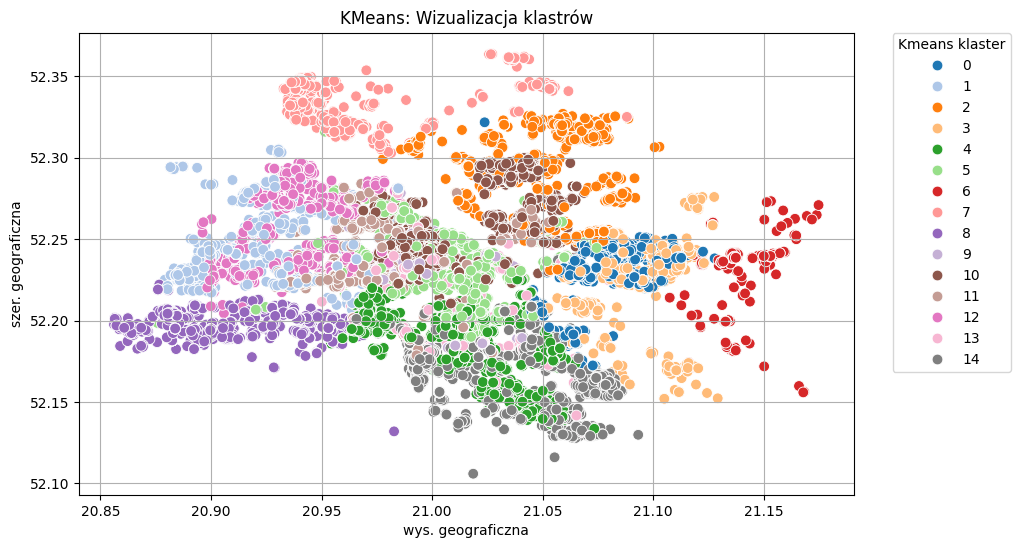

In [36]:
palette = sns.color_palette("tab20", 15)

mpl.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df["wys. geograficzna"], y=df["szer. geograficzna"], hue=df["Kmeans klaster"], palette=palette, s=60)
mpl.title("KMeans: Wizualizacja klastrów")
mpl.grid(True)
mpl.legend(
    title="Kmeans klaster",
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',         
    borderaxespad=0.
)
mpl.show()

In [37]:
df_stats = df.groupby("Kmeans klaster")[["powierzchnia", "cena_m2", "odl_od_metra","rok_budowy","piętro","szer. geograficzna", "wys. geograficzna"]].agg(["mean", "std"])
df_stats

powierzchnia                  cena_m2               \
                       mean        std          mean          std   
Kmeans klaster                                                      
0                 50.110360  16.125770  15523.479544  2248.565010   
1                 61.180209  19.763575  17845.284582  2721.490410   
2                 52.570721  17.125792  15650.826091  2703.472281   
3                 52.890601  20.611876  18285.400091  2943.833101   
4                 48.336602  13.504006  16363.965116  2234.056538   
5                 57.125794  25.102492  23845.146071  4748.137483   
6                 57.849704  20.150757  14274.073251  1924.568433   
7                 56.485321  18.145969  13908.870940  1915.508663   
8                 55.962932  19.367664  16279.016323  2557.639210   
9                 55.001250  24.523493  35191.359125  4775.385836   
10                42.952056  11.718380  17638.688283  3535.570743   
11                48.961204  17.514260  23560.104788  2879.743587   
12                49.547562  13.589127  15356.105750  2216.855891   
13               124.022660  22.323276  27376.970943  5944.170438   
14                65.211795  20.822369  20072.139939  3499.635904   

               odl_od_metra             rok_budowy               piętro  \
                       mean       std         mean        std      mean   
Kmeans klaster                                                            
0                  3.070969  0.837924  1969.973621  12.801622  3.637890   
1                  1.451730  0.730295  2013.964630   9.559983  2.337621   
2                  1.956735  1.108746  2017.580537   9.106017  2.093960   
3                  3.935424  0.805508  2017.557377   9.083297  3.030965   
4                  1.468094  0.915243  1970.944444  10.472326  3.563307   
5                  0.751424  0.590640  1940.889060  14.398539  2.171032   
6                  6.937892  0.792544  2013.014778  18.238648  1.827586   
7                  5.012094  1.183422  2012.401376  11.300774  2.300459   
8                  4.524324  0.830241  2015.527950  15.342306  2.704348   
9                  0.629812  0.391583  2020.270833   7.116895  4.683333   
10                 0.626726  0.347412  1967.801693   8.847202  4.377267   
11                 0.910592  0.563274  2018.092068   7.812975  4.484419   
12                 0.961941  0.585291  1972.326562  10.926755  4.214062   
13                 1.099650  0.769326  2013.208754  12.530646  4.037037   
14                 1.650881  0.789266  2013.170385  10.031290  2.610548   

                         szer. geograficzna           wys. geograficzna  \
                     std               mean       std              mean   
Kmeans klaster                                                            
0               2.899072          52.228581  0.020309         21.078930   
1               2.027627          52.246338  0.024149         20.923841   
2               1.907411          52.290145  0.025140         21.050015   
3               2.974488          52.221428  0.027531         21.093155   
4               2.855375          52.185550  0.020995         21.013585   
5               1.571356          52.229763  0.018979         21.012042   
6               1.698814          52.226152  0.025661         21.139335   
7               1.991730          52.333534  0.013191         20.970623   
8               2.016609          52.197063  0.008039         20.913817   
9               4.681457          52.223632  0.022980         21.004859   
10              3.415229          52.256295  0.022769         21.014022   
11              3.547915          52.237717  0.021479         20.981488   
12              3.524933          52.257517  0.022517         20.938624   
13              3.695593          52.210568  0.029138         21.012458   
14              2.431696          52.167783  0.019941         21.036402   

                          
                     std  
Kmeans klaster  

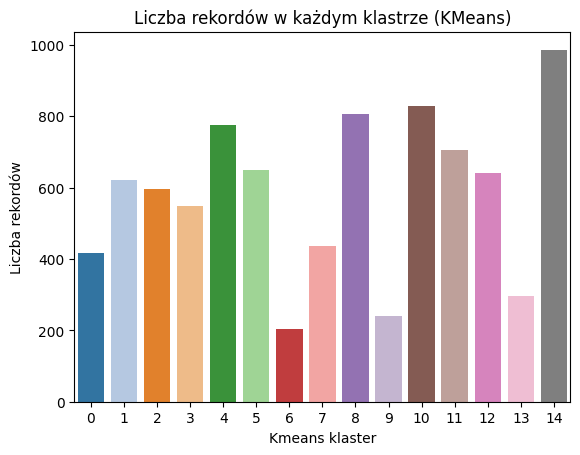

In [ ]:
sns.countplot(x="Kmeans klaster", data=df, hue=df["Kmeans klaster"] ,palette="tab20", legend =False)
mpl.title("Liczba rekordów w każdym klastrze (KMeans)")
mpl.xlabel("Kmeans klaster")
mpl.ylabel("Liczba rekordów")
mpl.show()

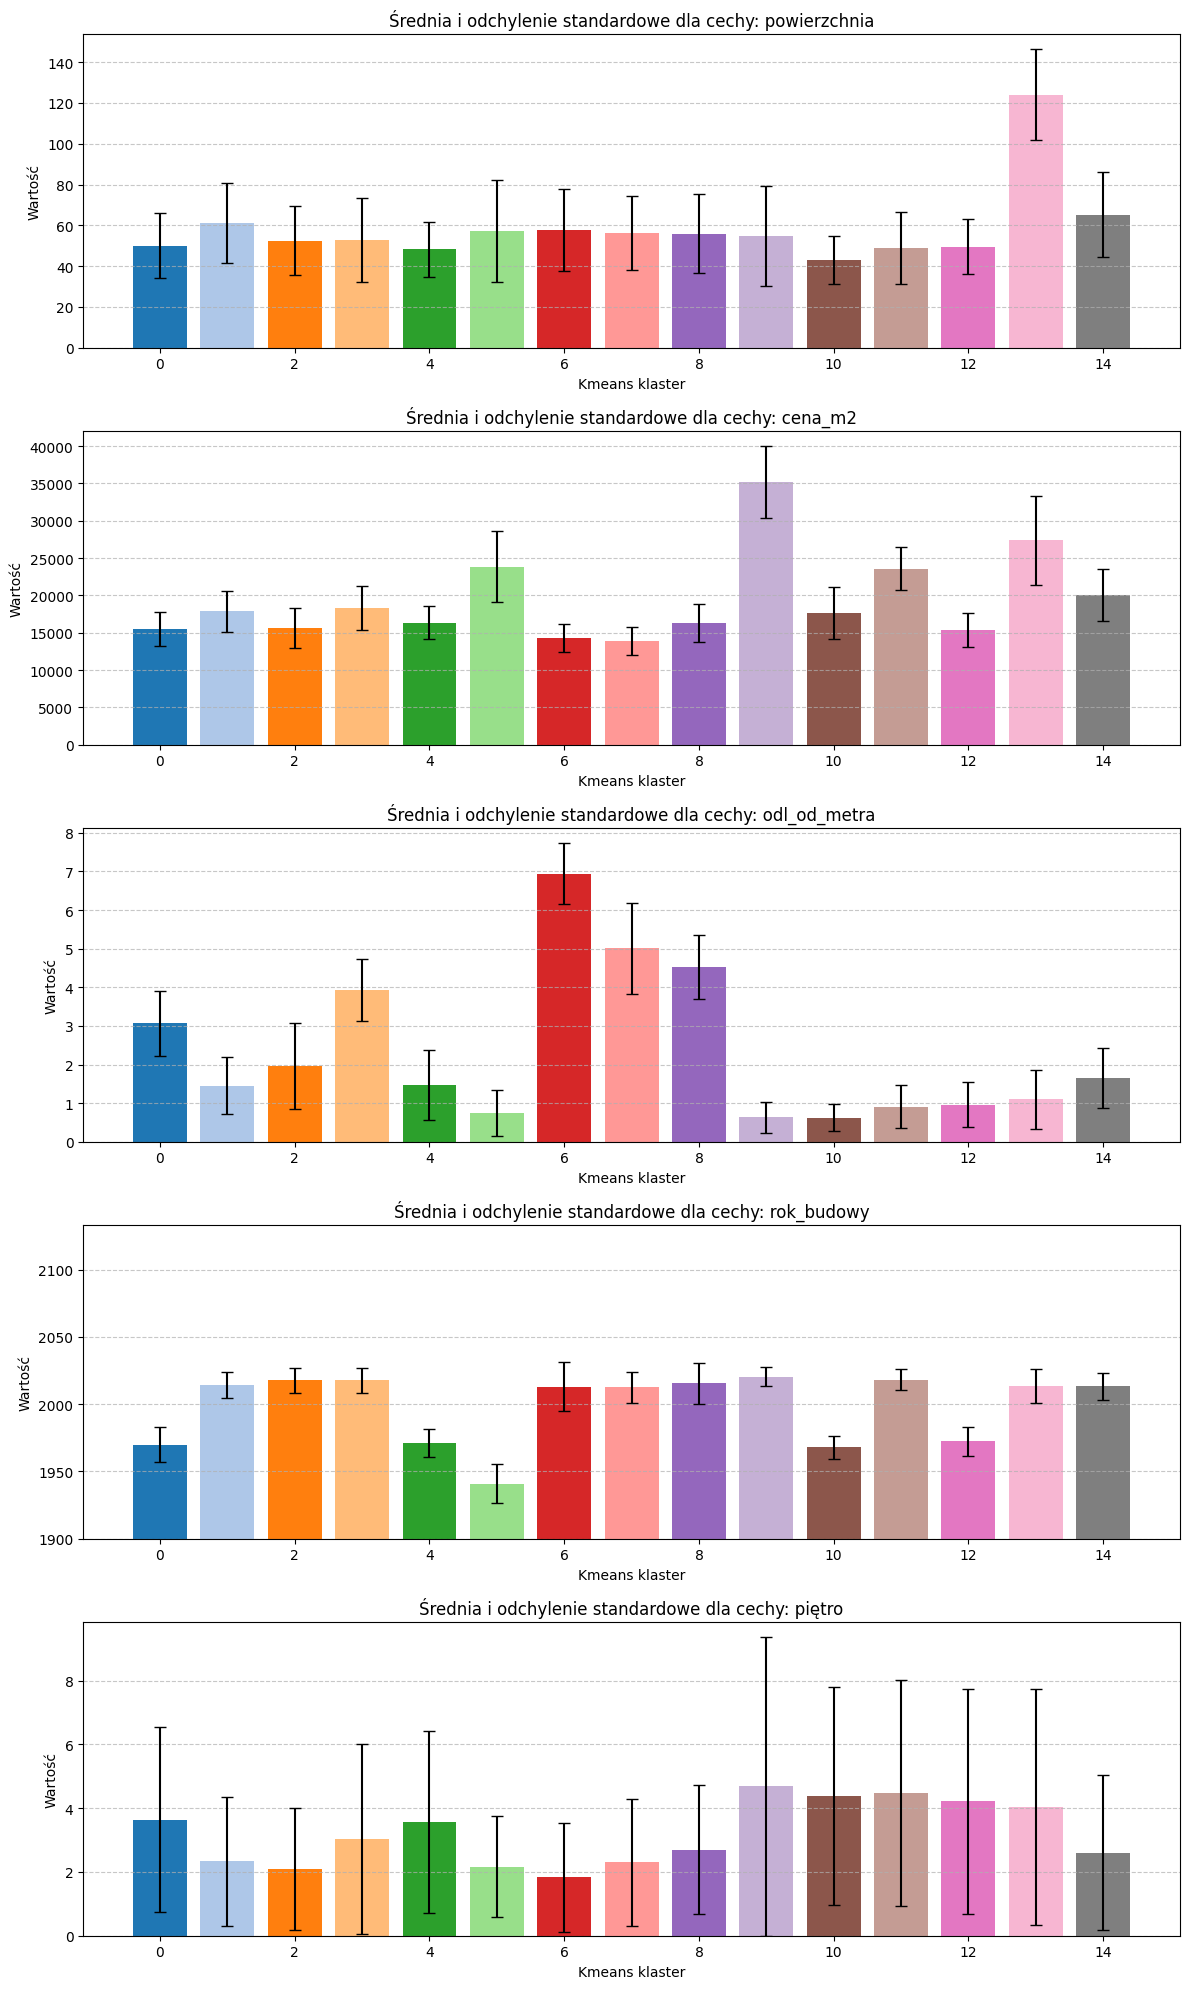

In [ ]:
features = ["powierzchnia", "cena_m2", "odl_od_metra", "rok_budowy", "piętro"]

fig, axes = mpl.subplots(len(features), 1, figsize=(12, 20))

for i, feature in enumerate(features):
    ax = axes[i]
    means = df_stats[feature]["mean"]
    stds = df_stats[feature]["std"]
    
    ax.bar(
        x=means.index, 
        height=means.values, 
        yerr=stds.values, 
        color=palette, 
        capsize=4
    )

    if feature == "rok_budowy":
        ax.set_ylim(1900,)
    
    ax.set_title(f"Średnia i odchylenie standardowe dla cechy: {feature}")
    ax.set_xlabel("Kmeans klaster")
    ax.set_ylabel("Wartość")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

mpl.tight_layout()
mpl.show()

Analiza wyników

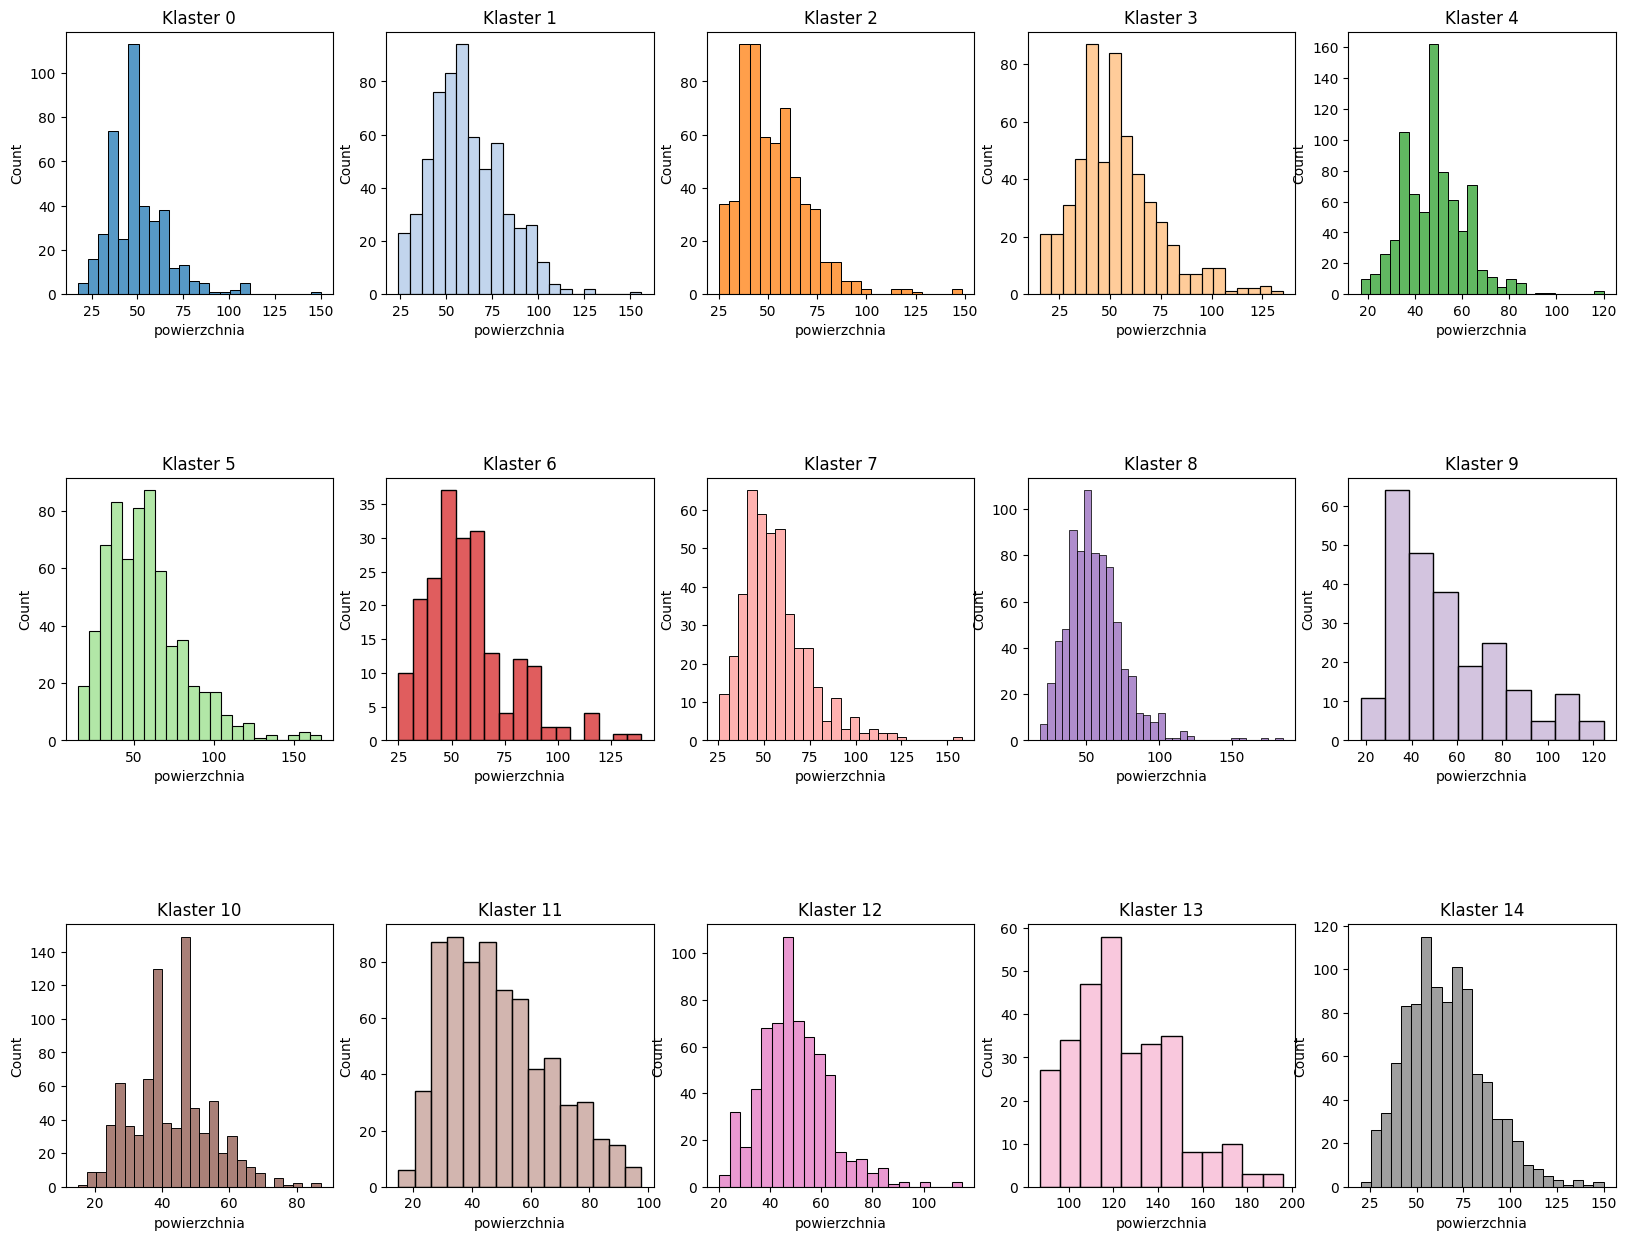

In [ ]:
fig, axes = mpl.subplots(3, 5, figsize = (20, 15))
palette = sns.color_palette("tab20")


for cluster_num in range(15): #mamy 15 klastrów
    posy, posx = cluster_num% 5, cluster_num // 5
    df_cluster = df[df["Kmeans klaster"] == cluster_num]
    sns.histplot(x=df_cluster["powierzchnia"], ax = axes[posx, posy], color =palette[cluster_num])
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)


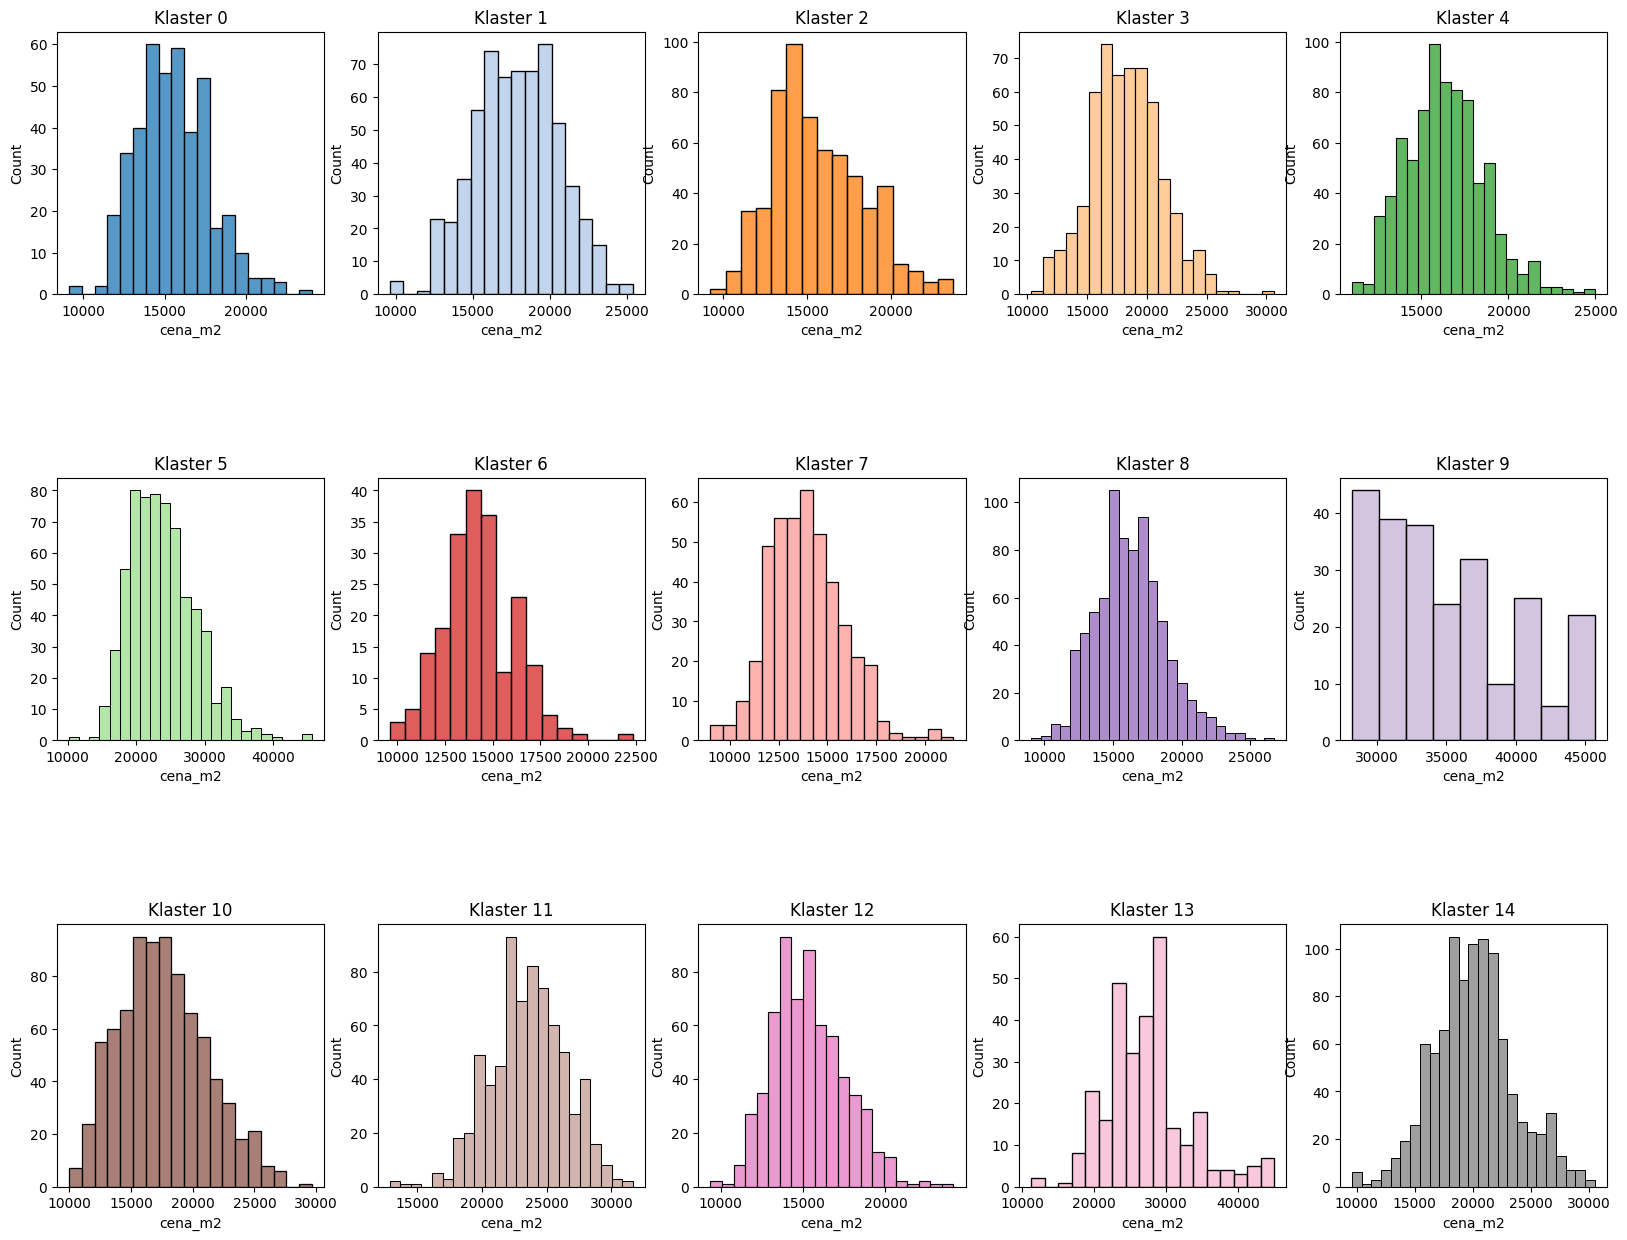

In [ ]:
fig, axes = mpl.subplots(3, 5, figsize = (20, 15))

for cluster_num in range(15): 
    posy, posx = cluster_num% 5 , cluster_num // 5
    df_cluster = df[df["Kmeans klaster"] == cluster_num]
    sns.histplot(x=df_cluster["cena_m2"], ax = axes[posx, posy], color = palette[cluster_num])
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)

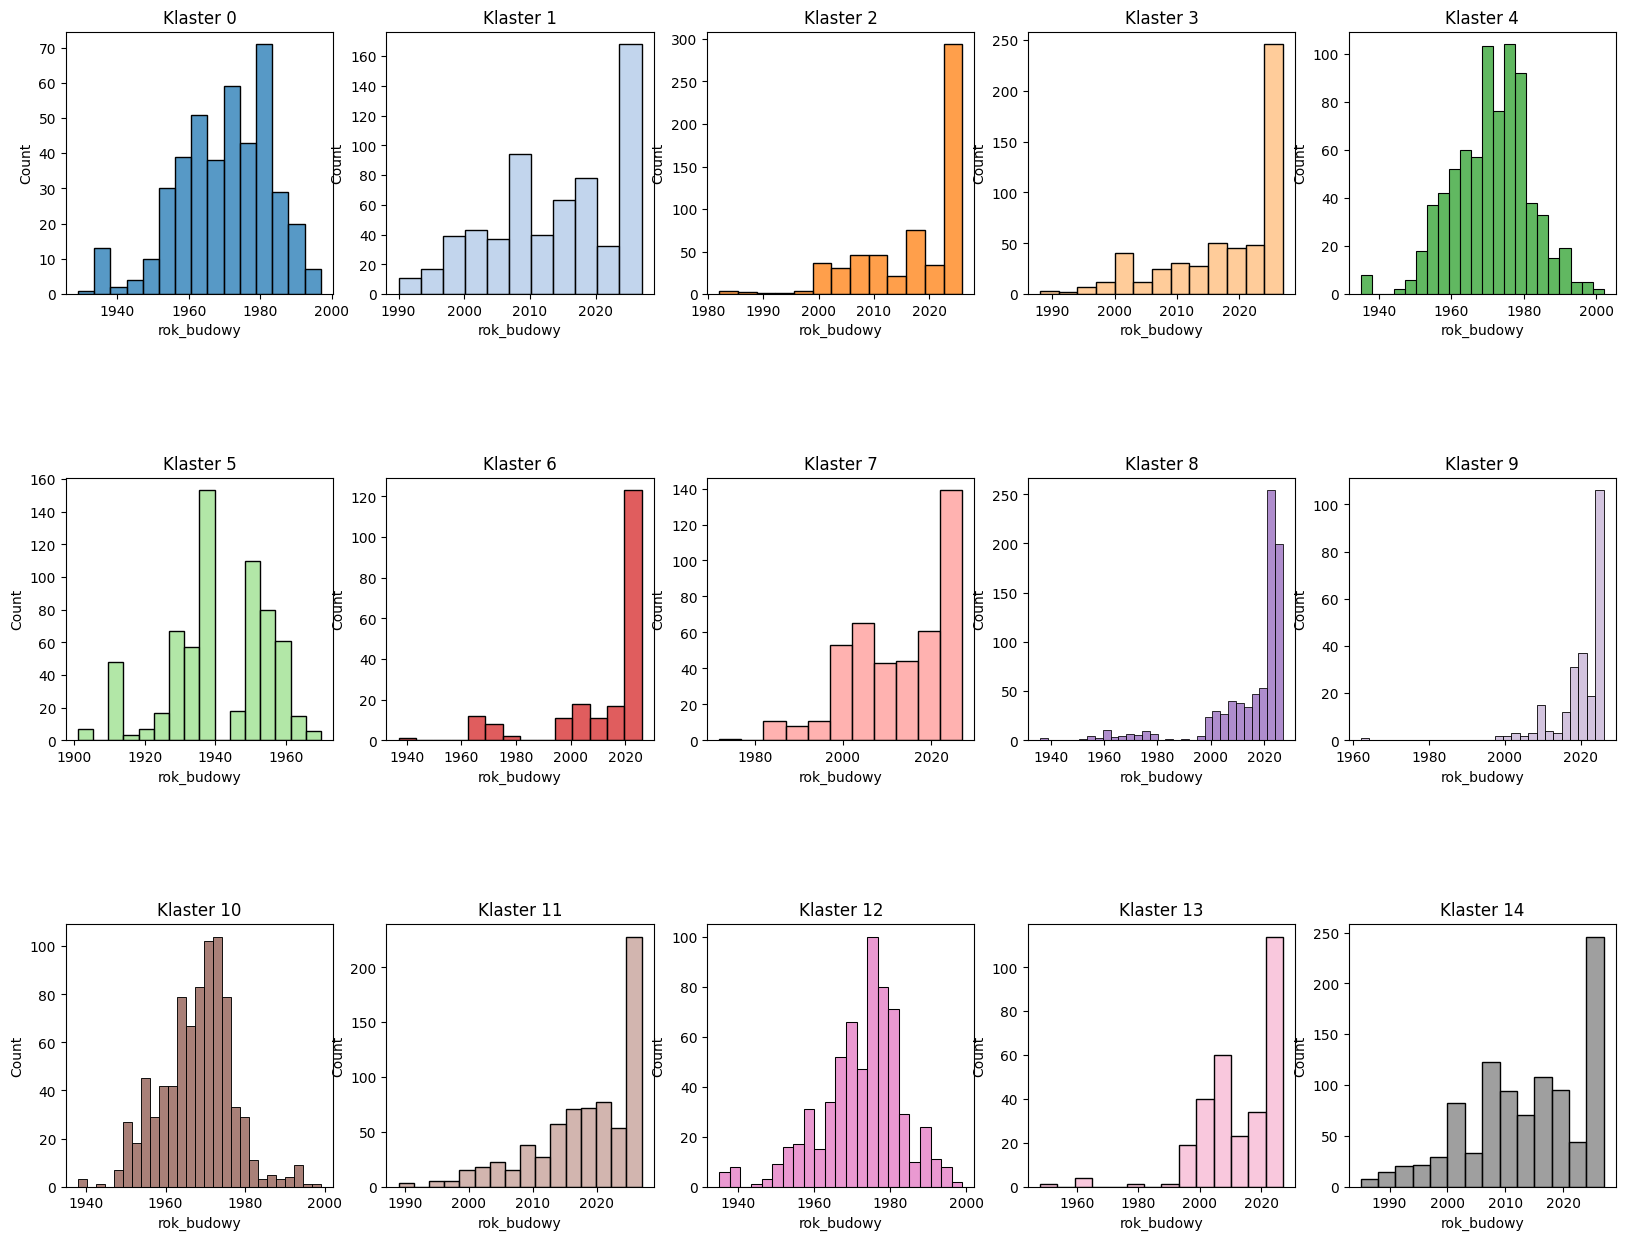

In [ ]:
fig, axes = mpl.subplots(3, 5, figsize = (20, 15))

for cluster_num in range(15): 
    posy, posx = cluster_num% 5 , cluster_num // 5
    df_cluster = df[df["Kmeans klaster"] == cluster_num]
    sns.histplot(x=df_cluster["rok_budowy"], ax = axes[posx, posy], color = palette[cluster_num])
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)

<ol start="6">
    <ol type ="a">
        <ol type="I" start="3">
        <h4><li>Omówienie wyników</li></h4>
        <p>Wyniki klasteryzacji wykazały, że niektóre obszary Warszawy charakteryzują się większym zróżnicowaniem typów nieruchomości, co przejawia się obecnością wielu różnych klastrów w jednym rejonie. Dotyczy to przede wszystkim centralnych i bardziej rozwiniętych dzielnic, takich jak Śródmieście, Mokotów, Ursynów, Praga, Żoliborz czy Targówek. Z kolei na obrzeżach miasta obserwuje się mniejszą różnorodność – dominują tam bardziej jednorodne klastry, co sugeruje spójniejszy charakter zabudowy i oferty mieszkaniowej. </p>
        <p>Wśród wszystkich zidentyfikowanych klastrów widać zależność między ceną a takimi cechami jak piętro, odległość od metra oraz bliskość centrum.</p>
        <ul>
        <li>Klastry 5, 9, 11 i 13, które znajdują się w centralnej części miasta charakteryzują się zauważalnie wyższymi cenami za m^2</li>
        <li>Klastry 9 i 11, mające średnio najwyższe piętro mają jedne z najwyższych cen za m^2 w mieście</li>
        <li>Klastry 6 i 7, mające średnio największą odległość od metra mają również średnio najniższą cenę za m^2</li>
        </ul>
        <br><br>
        <center><p>Wśród wszystkich zidentyfikowanych klastrów można wyróżnić kilka, które znacząco odstają od reszty pod względem swoich cech – zarówno jeśli chodzi o ceny, powierzchnię, wiek budynków, jak i lokalizację. Klastry te reprezentują skrajne wartości w analizowanych zmiennych, co sprawia, że stanowią osobne segmenty na rynku nieruchomości.</p></center>
        <ul>
            <li>Klaster 5 składa się z mieszkań o bardzo wczesnym średnim roku budowy (~1940). Mieszkania są stosunkowo duże (średnio 57 m²), położone w centrum miasta i mają wysoką cenę za metr kwadratowy (~24 000 zł/m²).</li>
            <li>Klaster 9 zawiera niewielką liczbę ogłoszeń. Mieszkania w tym klastrze są jednymi z najmłodszych w całym zbiorze, znajdują się na wysokich piętrach i cechują się bardzo wysoką ceną za m². Lokalizacja mieszkań jest bliska centrum miasta.</li>
            <li>Klaster 13 to grupa mieszkań o bardzo dużych powierzchniach i bardzo wysokiej cenie za metr kwadratowy. Również zlokalizowana jest blisko centrum.</li>
            <li>Klaster 10 zawiera najmniejsze i najstarsze mieszkania w zbiorze. Lokalizacja tych mieszkań znajduje się niedaleko centrum, lekko na zachód od jego granic.</li>
            <li>Klaster 6 to grupa z niewielką liczbą ogłoszeń. Mieszkania są stosunkowo tanie, a ich lokalizacja znajduje się daleko na wschód, na obrzeżach miasta.</li>
        </ul>
        <br>
        </ol>
    </ol>
</ol>

<ol start="6">
    <ol type ="a" start="2">
        <h3><li>Metoda DBSCAN</li></h3>
        <ol type="I">
        <h4><li>Obliczenie indeksów: Calinski-Harabasz, Silhouette, Davies-Bouldin  </li></h4>
        </ol>
        <p>Wyniki uzyskane z podanych miar jakości klasteryzacji pomogą nam znaleźć optymalną liczbę klastrów dla naszego zbioru danych.</p>
        <ul>
            <li>Calinski-Harabasz Score</li>
                <p>Mierzy stosunek rozdzielności klastrów (między klastrami) do ich zwartości (w obrębie klastrów),
                Im wyższy, tym lepsze klastry (bardziej zwarte i odseparowane).<p>
            <li>Silhouette Score</li>
                <p>Mierzy jak podobny jest punkt do swojego klastra w porównaniu do najbliższego innego klastra. Przyjmuje wartości od -1 do 1. Im bliżej 1 tym lepsze dopasowanie.<p>
            <li>Davies-Bouldin Score</li>
                <p>Mierzy przeciętny stosunek wewnątrzklastrowego rozrzutu do odległości międzyklastrowej. Im niższy, tym lepsze klastry.<p>
            <li>WCSS (Within-Cluster Sum of Squares) </li>
                <p>Suma kwadratów odległości punktów od centroidu klastra. Wartość maleje wraz ze wzrostem liczby klastrów. Używany do metody łokcia → dobór liczby klastrów.<p>
        </ul>
    </ol>
</ol>

In [ ]:

# większy epsilon - > mniejszy noise
# większy min_samples - > większy noise

def DBscan_scoring_df(data: pd.DataFrame):

    dictionary = {"clusters":  [], "Calinski-Harabasz":[], "Silhouette":[],"Davies-Bouldin":[], "Noise": []}

    epsilon = np.arange(0.1,0.26, 0.02)
    min_samples = np.arange(5, 10, 1)

    cartesian_product = np.array(np.meshgrid(epsilon, min_samples)).T.reshape(-1, 2)

    for epsilon, samples in cartesian_product:     

        dbscan = DBSCAN(eps = epsilon, min_samples= int(samples) , n_jobs = -1)
        dbscan.fit_predict(data)
        calculate_scores(data, dbscan.labels_, dictionary)
        dictionary["Noise"].append(np.sum(dbscan.labels_ == -1))
        dictionary["clusters"].append(len(set(dbscan.labels_)))

    return pd.concat([pd.DataFrame(cartesian_product, columns=["epsilon", "min_samples"]), pd.DataFrame(dictionary)], axis = 1)



In [ ]:
DBscan_df_results = DBscan_scoring_df(df_processed)
DBscan_df_results_ncat = DBscan_scoring_df(df_processed_ncat)

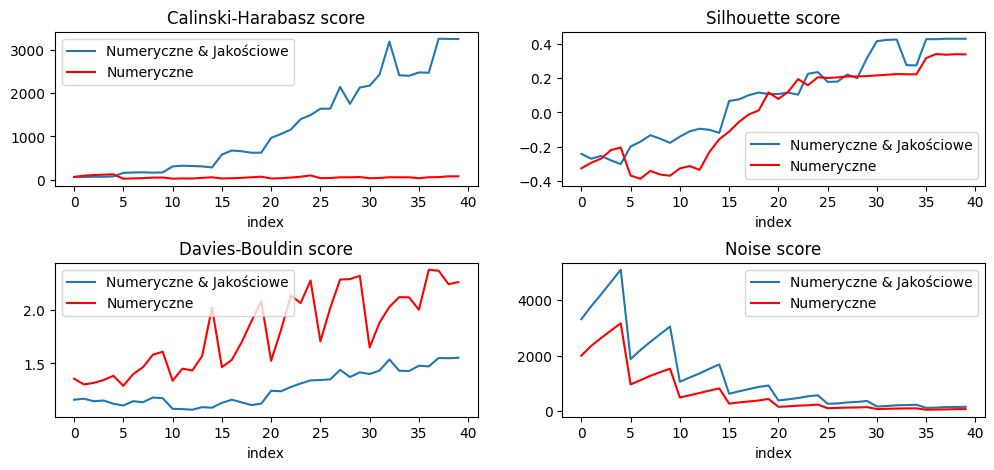

In [ ]:
fig, axes = mpl.subplots(2, 2, figsize=(12, 5))

highlight_idx = np.arange(0,35,5)  

for idx, score in enumerate(DBscan_df_results.columns[3:]):

    posx, posy = int(idx >= 2), int(idx % 2)
    
    sns.lineplot(x=DBscan_df_results.index, y=DBscan_df_results[score], ax=axes[posx, posy], label="Numeryczne & Jakościowe")
    sns.lineplot(x=DBscan_df_results_ncat.index, y=DBscan_df_results_ncat[score], ax=axes[posx, posy], color="red", label="Numeryczne")
    
    axes[posx, posy].set_xlabel("index")
    axes[posx, posy].set_ylabel("")
    axes[posx, posy].set_title(score + " score")

mpl.subplots_adjust(hspace=0.5)

#trzeba znaleźć w miarę optymalne (epsilon,min_samples)


<h4>Calinski-Harabasz score</h4>
Najlepsze wartości są maksymalne, czyli im wyżej tym lepiej.

Dla danych Numeryczne & Jakościowe (niebieska linia), widzimy szczyt około indeksu 30–35.

Dla danych Numeryczne (czerwona linia), metryka jest znacznie niższa – sugeruje słabszą jakość klastrów.

<br><h4>Silhouette score</h4>
Najlepsze wartości są bliskie 1, im wyżej tym lepiej.

Niebieska linia osiąga maksima około indeksu 30–35, powyżej 0.4.

Czerwona linia (Numeryczne) też osiąga wartości bliskie 0.35–0.4, ale nadal niższe niż niebieska.

<br><h4>Davies-Bouldin score</h4>
Tutaj niższe wartości są lepsze.

Niebieska linia jest niższa i bardziej stabilna w zakresie 30–35.

Czerwona linia jest wyższa, co oznacza gorsze klastry.

<br><h4> Noise score</h4>
Chcemy niskie wartości szumu, więc im niżej, tym lepiej.

Niebieska i czerwona linia zbliżają się do zera po indeksie 30, co wskazuje na dobrą separację klastrów. 
<br><br><br>
<ol start="6">
    <ol type ="a">
        <ol type="I" start="2">
        <h4><li>Rezultaty w postaci w postaci tabelarycznej i graficznej: </li></h4>
        </ol>
    </ol>
</ol>

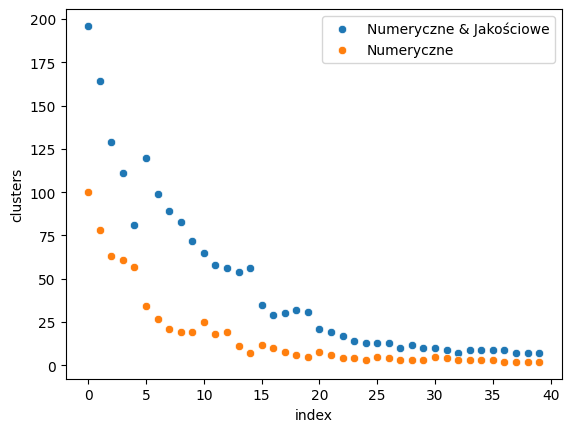

In [ ]:

sns.scatterplot(x = DBscan_df_results.index, y = DBscan_df_results["clusters"], label="Numeryczne & Jakościowe")
sns.scatterplot(x = DBscan_df_results_ncat.index, y = DBscan_df_results_ncat["clusters"] ,label = "Numeryczne")
mpl.xlabel("index")
mpl.show()

In [ ]:
DBscan_df_results.head(10)

,epsilon,min_samples,clusters,Calinski-Harabasz,Silhouette,Davies-Bouldin,Noise
0,0.10,5.0,196,62.428954,-0.241316,1.160652,3310
1,0.10,6.0,164,62.055165,-0.269854,1.170099,3775
2,0.10,7.0,129,68.529620,-0.253464,1.146855,4203
3,0.10,8.0,111,66.485552,-0.279108,1.152913,4646
4,0.10,9.0,81,75.958193,-0.301095,1.123285,5093
5,0.12,5.0,120,156.922843,-0.198612,1.106454,1874
6,0.12,6.0,99,165.986085,-0.170388,1.146964,2197
7,0.12,7.0,89,170.303968,-0.132681,1.137302,2493
8,0.12,8.0,83,162.849605,-0.153200,1.181668,2770
9,0.12,9.0,72,169.230716,-0.177293,1.174737,3045


In [38]:
dbscan_model = DBSCAN(eps=0.22, min_samples= 5)
dbscan_model.fit_predict(df_processed)

array([-1, -1,  0, ...,  1,  1,  1], shape=(8747,))

In [39]:
df["DBSCAN klaster"] = dbscan_model.labels_
df

,powierzchnia,odl_od_metra,rok_budowy,parking,piętro,budownictwo,cena_m2,szer. geograficzna,wys. geograficzna,Kmeans klaster,DBSCAN klaster
2,60.00,7.791,2024.0,True,0,True,13666.67,52.363506,21.025740,7,-1
3,130.84,4.281,2025.0,True,0,True,10623.66,52.106000,21.018577,14,-1
4,50.00,0.540,1977.0,False,4,False,15500.00,52.237038,20.935803,12,0
5,65.10,4.270,1995.0,True,3,False,13056.84,52.232940,21.101800,3,1
13,43.90,4.673,2001.0,False,8,False,13895.22,52.332987,20.934653,7,0
...,...,...,...,...,...,...,...,...,...,...,...
10052,29.00,0.048,1968.0,False,4,False,16206.90,52.292110,21.047960,10,0
10054,96.30,0.478,2004.0,True,5,False,23001.04,52.237250,20.999890,13,1
10055,55.00,0.511,2002.0,True,4,False,17527.27,52.145432,21.056216,14,1
10056,69.00,0.511,2002.0,True,6,False,20000.00,52.145432,21.056216,14,1


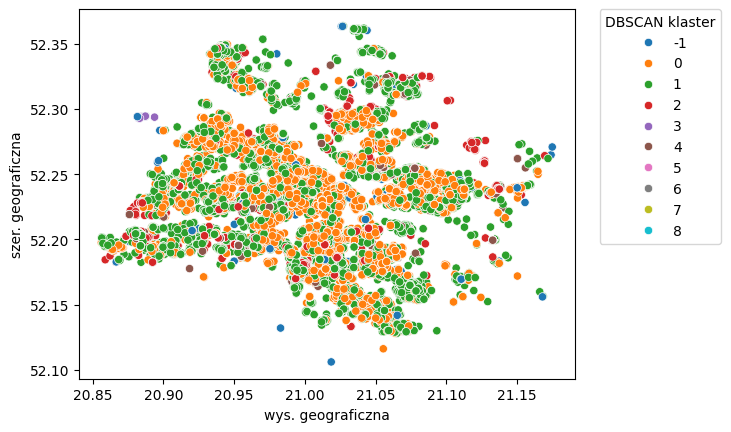

In [40]:
sns.scatterplot(x = df["wys. geograficzna"], y = df["szer. geograficzna"], hue = df["DBSCAN klaster"], palette = 'tab10')
mpl.legend(
    title = "DBSCAN klaster",
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',         
    borderaxespad=0.
)
mpl.show()

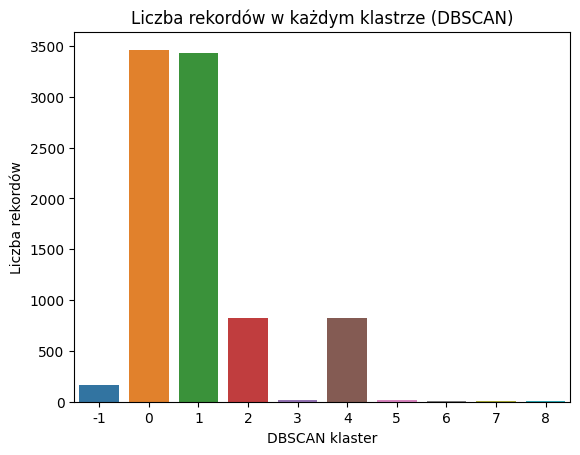

In [ ]:
sns.countplot(x="DBSCAN klaster", data=df, hue=df["DBSCAN klaster"] ,palette="tab10", legend =False)
mpl.title("Liczba rekordów w każdym klastrze (DBSCAN)")
mpl.xlabel("DBSCAN klaster")
mpl.ylabel("Liczba rekordów")
mpl.show()

In [41]:
dbscan_stats = df.groupby("DBSCAN klaster")[["powierzchnia", "cena_m2", "odl_od_metra","rok_budowy","piętro","szer. geograficzna", "wys. geograficzna"]].agg(["mean", "std"])
dbscan_stats.drop(index=-1, inplace=True) #usuwamy rekordy oznaczone jako szum
dbscan_stats

powierzchnia                  cena_m2               \
                       mean        std          mean          std   
DBSCAN klaster                                                      
0                 48.934697  16.981425  18049.554269  4547.124783   
1                 61.959359  23.315606  19061.916657  5274.537457   
2                 59.858104  23.049623  17574.365869  4553.013097   
3                 54.105789   7.475444  13189.473684   338.123477   
4                 48.732833  20.552318  20528.728217  5799.416707   
5                 42.396923  17.601939  25253.088462   359.344827   
6                163.720000   9.016842  41834.173333  2710.552208   
7                 74.198000   0.032711  35122.054000  1701.830615   
8                124.535000  12.595718  29695.888333  1437.863275   

               odl_od_metra             rok_budowy                piętro  \
                       mean       std         mean        std       mean   
DBSCAN klaster                                                             
0                  1.574579  1.474132  1975.023686  24.643052   3.448585   
1                  2.275245  1.774159  2003.564850  20.653869   3.040513   
2                  2.833335  1.935979  2024.922236   1.327705   2.563791   
3                  3.000421  0.207644  2024.105263   0.315302   1.473684   
4                  2.684122  1.939649  2024.942613   1.061843   2.789988   
5                  1.835769  0.716455  1936.000000   0.000000   3.076923   
6                  1.624000  0.173080  2024.000000   0.000000   1.000000   
7                  1.592400  0.173080  2024.000000   0.000000   1.000000   
8                  1.073667  0.357458  2026.166667   0.408248  15.166667   

                         szer. geograficzna           wys. geograficzna  \
                     std               mean       std              mean   
DBSCAN klaster                                                            
0               2.960217          52.230845  0.040179         21.004227   
1               2.737035          52.229527  0.052195         21.001553   
2               2.350234          52.228737  0.047175         20.996131   
3               0.512989          52.294088  0.000543         20.885052   
4               2.225623          52.228029  0.039064         21.016008   
5               1.552500          52.246212  0.001605         21.069725   
6               0.894427          52.236330  0.002618         21.060050   
7               1.000000          52.236808  0.002618         21.060154   
8               0.983192          52.226192  0.005978         20.954985   

                          
                     std  
DBSCAN klaster            
0               0.054309  
1               0.063678  
2               0.076773  
3               0.003101  
4               0.065560  
5               0.010982  
6               0.000570  
7               0.000570  
8               0.002017

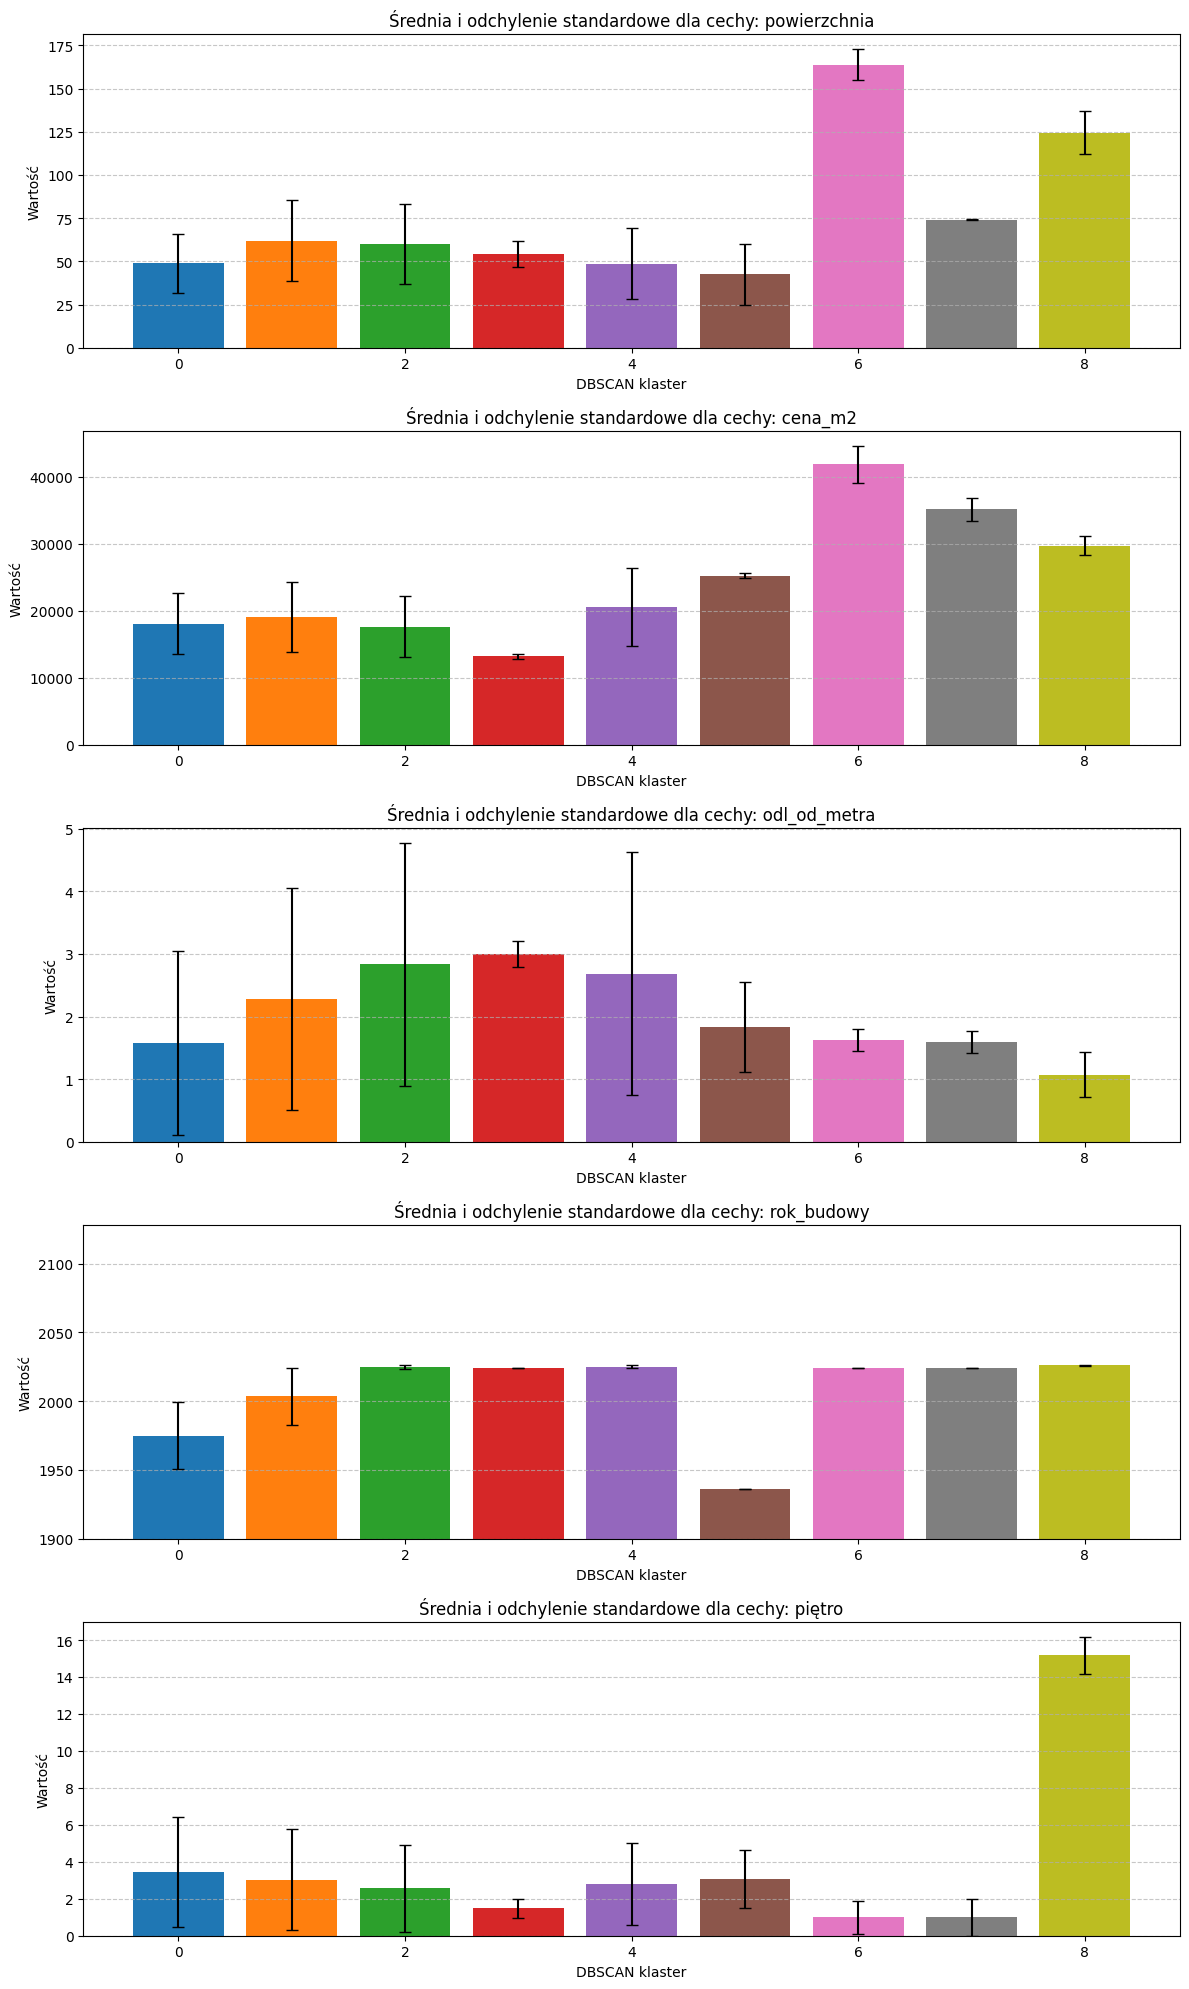

In [ ]:
features = ["powierzchnia", "cena_m2", "odl_od_metra", "rok_budowy", "piętro"]

fig, axes = mpl.subplots(len(features), 1, figsize=(12, 20))

palette = sns.color_palette("tab10", 10)

for i, feature in enumerate(features):
    ax = axes[i]
    means = dbscan_stats[feature]["mean"]
    stds = dbscan_stats[feature]["std"]
    
    ax.bar(
        x=means.index, 
        height=means.values, 
        yerr=stds.values, 
        color=palette,  
        capsize=4
    )

    if feature == "rok_budowy":
        ax.set_ylim(1900,)
    
    ax.set_title(f"Średnia i odchylenie standardowe dla cechy: {feature}")
    ax.set_xlabel("DBSCAN klaster")
    ax.set_ylabel("Wartość")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

mpl.tight_layout()
mpl.show()

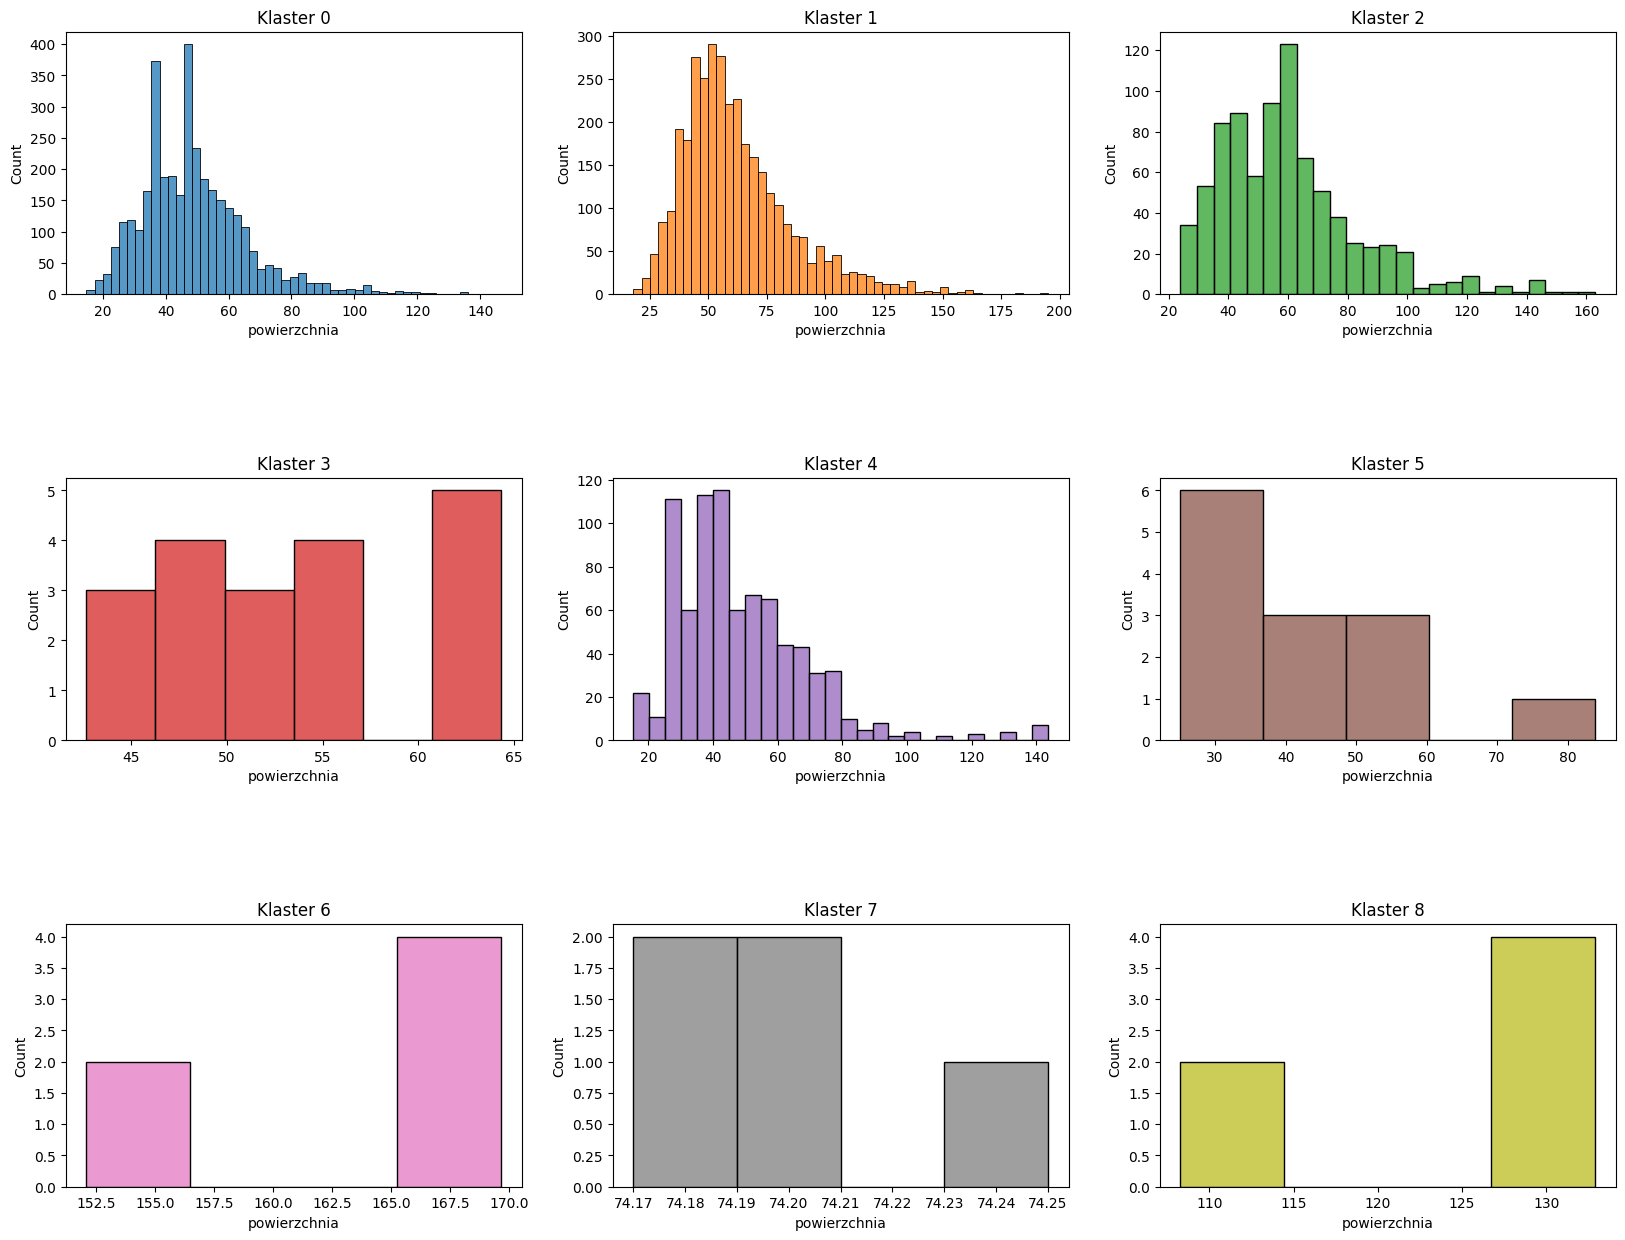

In [ ]:
fig, axes = mpl.subplots(3, 3, figsize = (20, 15))
colors= mpl.get_cmap('tab10')


for cluster_num in range(9): #mamy 9 klastrów
    posy, posx = cluster_num% 3 , cluster_num // 3
    df_cluster = df[df["DBSCAN klaster"] == cluster_num]
    sns.histplot(x=df_cluster["powierzchnia"], ax = axes[posx, posy], color = colors(cluster_num / 10))
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)

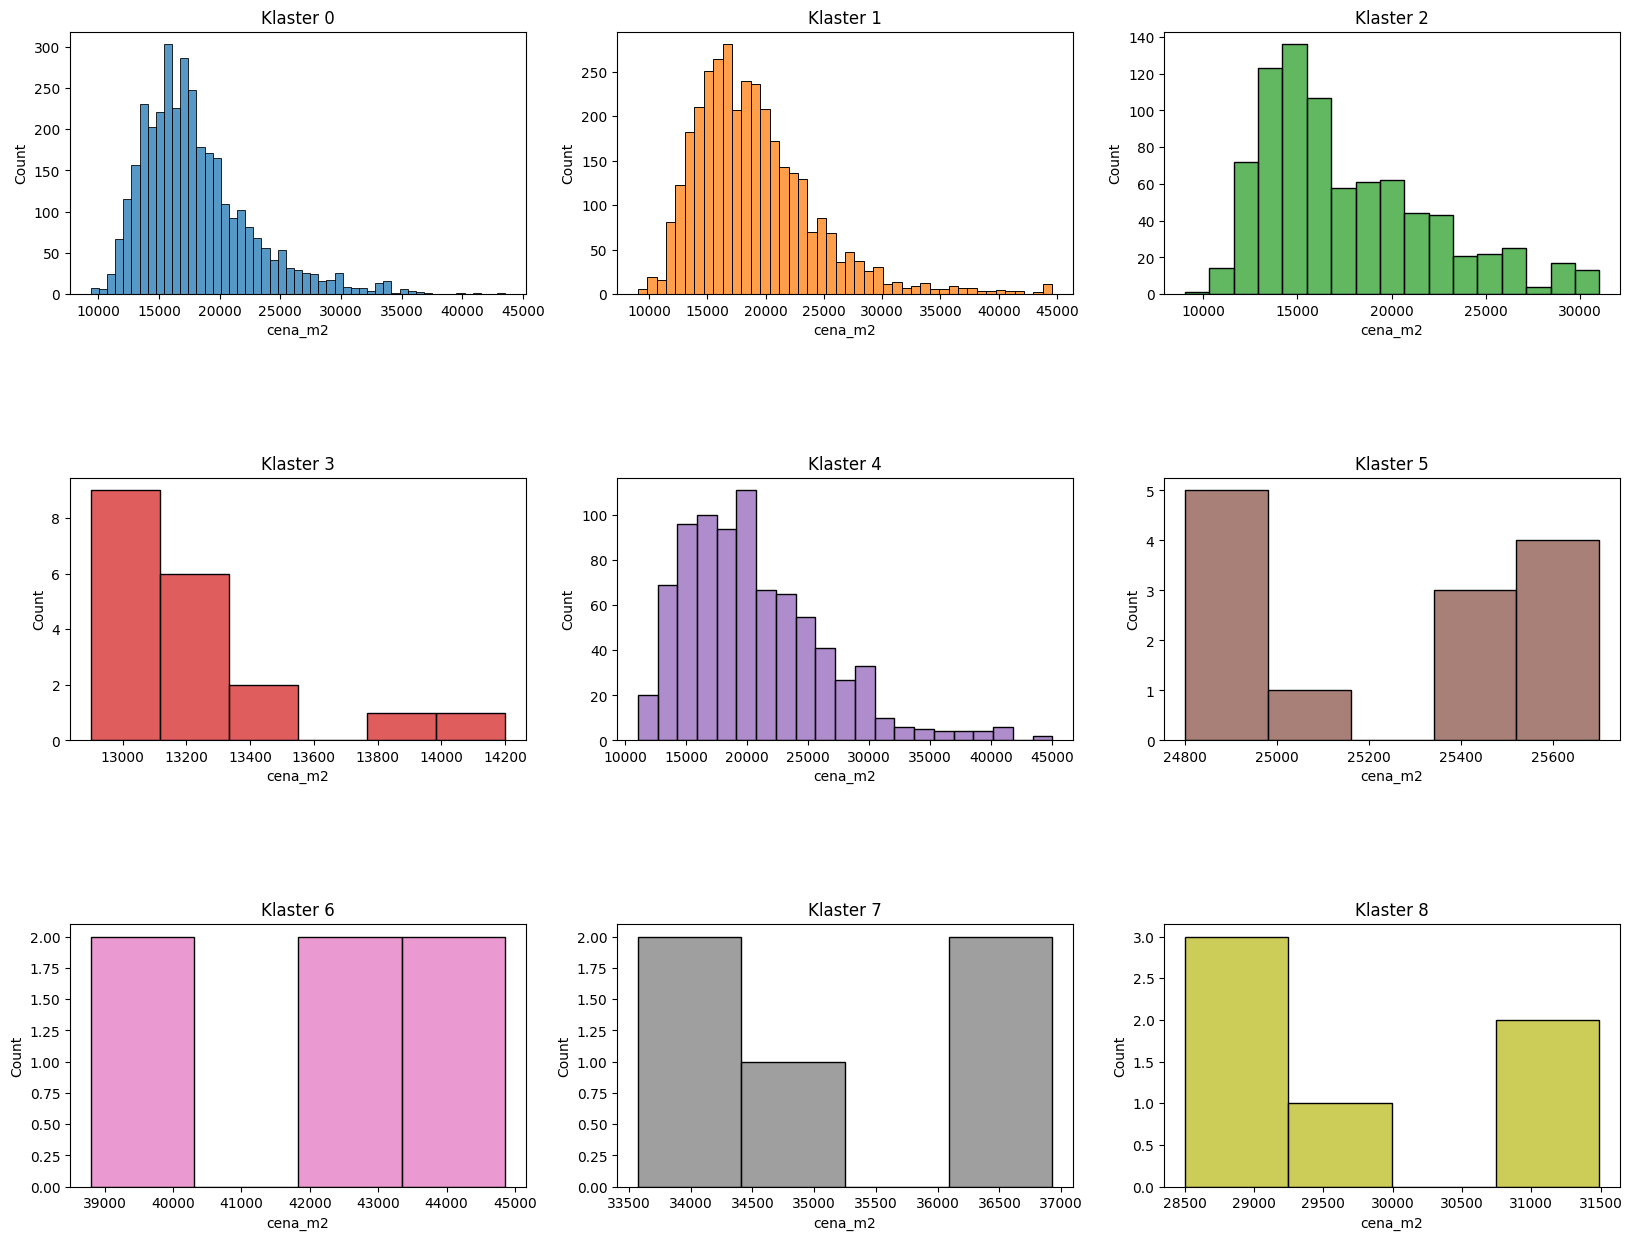

In [ ]:
fig, axes = mpl.subplots(3, 3, figsize = (20, 15))
colors= mpl.get_cmap('tab10')


for cluster_num in range(9):
    posy, posx = cluster_num% 3 , cluster_num // 3
    df_cluster = df[df["DBSCAN klaster"] == cluster_num]
    sns.histplot(x=df_cluster["cena_m2"], ax = axes[posx, posy], color = colors(cluster_num / 10))
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)

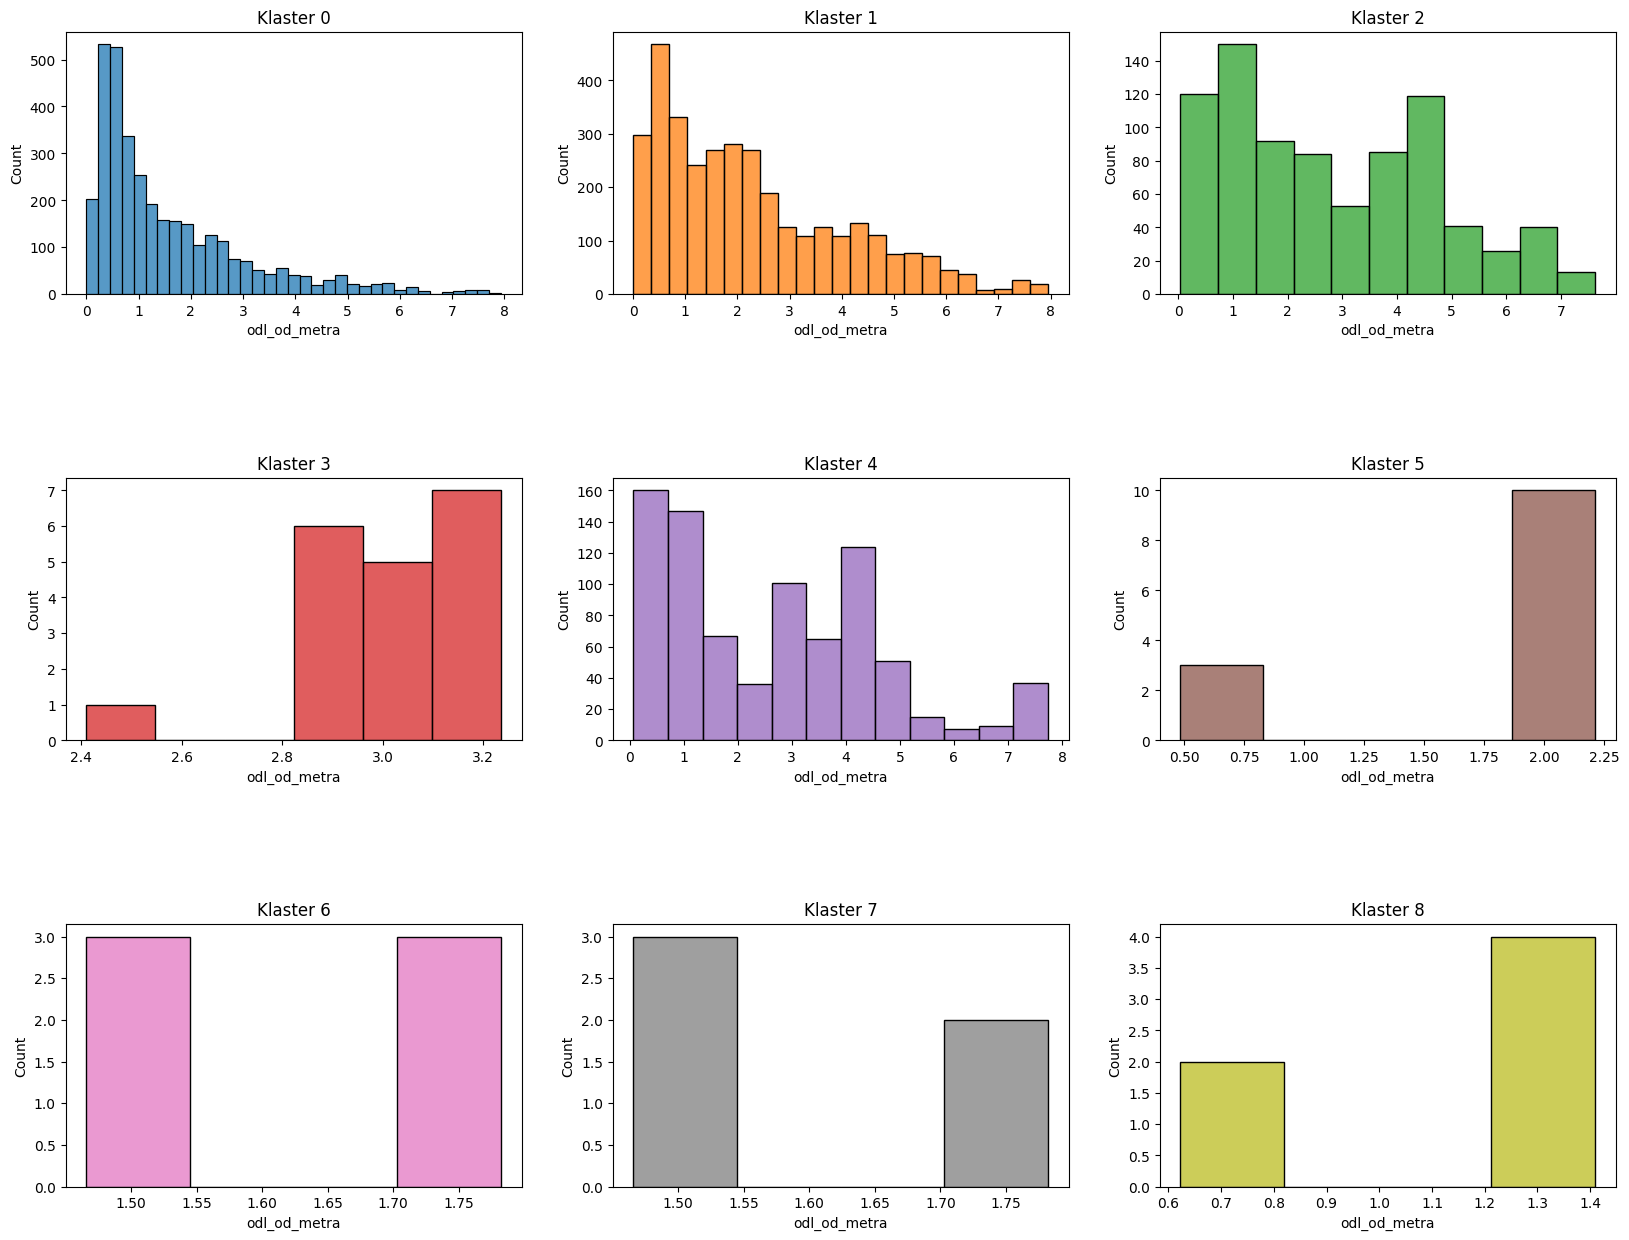

In [ ]:
fig, axes = mpl.subplots(3, 3, figsize = (20, 15))
colors= mpl.get_cmap('tab10')


for cluster_num in range(9):
    posy, posx = cluster_num% 3 , cluster_num // 3
    df_cluster = df[df["DBSCAN klaster"] == cluster_num]
    sns.histplot(x=df_cluster["odl_od_metra"], ax = axes[posx, posy], color = colors(cluster_num / 10))
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)

<ol start="6">
    <ol type ="a">
        <ol type="I" start="3">
        <h4><li>Omówienie wyników</li></h4>
        <p>Można zauważyć, że klastry 0, 1, 2, 4 obejmują większość rekordów, gdzie 0 oraz 1 są znacznie obszerniejsze. Zarówno klaster 0 jak i 1 są rozmieszczone na powierzchni całej Warszawy, jednak klaster 0 jest skupiony bliżej jej centrum.  Pasuje to do faktu, że mieszkania z klastra 0 są średnio wybudowane wcześniej (1975) niż te z klastra 1 (2003).  Mieszkania w klastrze 0 są oddalone od metra o średnio 1.57 km a ich średnia cena na metr kwadratowy wynosi około 18 tysięcy a powierzchnia 49 m^2.  Mieszkania z klastra 1 są nieco bardziej oddalone od metra (2.28 km) a ich cena na metr kwadratowy jest nieco wyższa, o wartości około 19 tysięcy. Wyższa cena pomimo większej odległości od metra może wynikać z ich późniejszej daty wybudowania lub nieco większej średniej powierzchni (62 m^2).</p>
        <p>Klastry 2 oraz 4 to nowe mieszkania, których średni rok budowy to 2024. Średni numer piętra dla obu z nich wynosi 3. Mieszkania z klastra 2 mają większą powierzchnie (59 m^2) niż te z klastra 4 (49 m^2) jednak są o około 200 metrów więcej oddalone od metra. Cena na metr^2 mieszkań w klastrze 2 wynosi ok. 17.5 tysiąca a w klastrze  4 około 20.5 tysiąca. Biorąc pod uwagę większą powierzchnię mieszkań w klastrze 2, brak znaczących różnic w innych cechach, oraz fakt, że cena mieszkań do niego należących jest znacząco niższa (około 3 tysiące),  można wyciągnąć wniosek, że mieszkania o większej powierzchni oferują niższą cenę za metr kwadratowy.</p>
        </ol>
    </ol>
</ol>

<ol start="7">
    <h2><li>Podsumowanie</li></h2>
    <ol type="a">
        <h3><li>Ocena realizacji projektu</li></h3>
        <p>Celem projektu była analiza rynku nieruchomości w Warszawie na podstawie danych z ogłoszeń sprzedaży mieszkań. Celem, którym było zidentyfikowanie grup podobnych mieszkań aby lepiej zrozumieć rynek został/nie_został osiągnięty</p>
        <p>Dane wykorzystane w projekcie w większości były odpowiedniej jakości. Jednak w zbiorze pojawiły się również braki danych oraz nieprawidłowości, które wynikały z błędów w lokalizacji ogłoszenia.  W kilku przypadkach, po obliczeniu odległości na podstawie współrzędnych geograficznych mieszkań, okazało się, że były one znacząco za duże, co sugerowało, że niektóre z mieszkań, mimo iż w ogłoszeniu wskazano je jako znajdujące się w Warszawie, w rzeczywistości były położone daleko poza granicami miasta. Dane zawerające ten błąd lub braki w którejś z badanych cech nie były poddane analizie. </p>
        <h3><li>Napotkane problemy przy realizacji projektu</li></h3>
        <p>W części ogłoszeń brakowało informacji o dzielnicy, więc przy niektórych wnioskach musieliśmy polegać wyłącznie na wizualizacji klastrów na podstawie współrzędnych, co mogło wpłynąć na dokładność. Nie mieliśmy też danych o stanie technicznym mieszkań ani o tym, czy są umeblowane – a to są rzeczy, które mogą znacząco wpływać na cenę. Nasza analiza opiera się więc tylko na podstawowych danych liczbowych, takich jak metraż, piętro, rok budowy czy odległość od metra.</p>
        <h3><li>Najwazniejsze wnioski</li></h3>
        <ul>
        <li>Klasteryzacja potwierdziła wiele intuicyjnych zależności na rynku takich jak wyższe ceny przez: bliską odległość od metra, położenie blisko centrum, wyższe piętro</li>
        <li>Na wizualizacji podziału na klastry metodą kmeans w układzie kartezjańskim widać, że klastry pokrywają się w dużym stopniu z dzielnicami warszawy. Wynika z tego, że mieszkania znajdujące się w poszeczegulnych dzielnicach mają wspólne cechy.</li>
        <li> Obszary położone w centrum miasta są bardziej zróżnicowane pod względem klastrów, a więc przejawiają one większą różnorodność cech. Obszary znajdujące się na obrzeżach są bardzoej jednordne, często zdefiniowane przez jeden klaster.</li>
        <li>Analiza pokazała że rynek sprzedaży nieruchomości jest zróżnicowany</li>
        </ul>
        <h3><li>Odwołanie do literatury</li></h3>
            <p><strong>Artykuł:</strong> 
            <a href="https://media.otodom.pl/wyzej-nie-zawsze-znaczy-drozej-czyli-jak-pietro-wplywa-na-cene-mieszkania" target="_blank">
            "Wyżej nie zawsze znaczy drożej – czyli jak piętro wpływa na cenę mieszkania" (otodom.pl)
            </a><br>
            Zgodnie z wynikami analizy KMeans, zauważono podobną zależność, jak w artykule, najwyższe piętra w mieszkaniach średnio charakteryzują się wyższymi cenami. Ponadto, najtańsze mieszkania często znajdują się na niższych piętrach lub parterze. Taka korelacja między ceną a piętrem została potwierdzona przez naszą klasteryzację, co sugeruje, że lokalizacja mieszkania w budynku ma rzeczywisty wpływ na jego wartość rynkową.
            </p>
            <p><strong>Artykuł:</strong> 
            <a href="https://urban.one/blog/ceny-metra-przy-metrze-ile-kosztuja-mieszkania-przy-linii-metra-m2/" target="_blank">
            "Ceny metra przy metrze – ile kosztują mieszkania przy linii metra?" (urban.one)
            </a><br>
            Podobnie jak w artykule, analiza KMeans wskazała, że mieszkania położone w pobliżu stacji metra wykazują średnio wyższe ceny. Wartości te są zgodne z wynikami analizy, które wykazały, że bliskość do transportu publicznego, szczególnie metra, ma znaczący wpływ na cenę mieszkań, co potwierdza ich wyższą cenę za metr kwadratowy.
            </p>    
            <p><strong>Artykuł:</strong> 
            <a href="https://i-budownictwo.pl/ile-kosztuje-metr-kwadratowy-mieszkania-w-starym-budownictwie" target="_blank">
            "Ile kosztuje metr kwadratowy mieszkania w starym budownictwie?" (i-budownictwo.pl)
            </a><br>
            W odniesieniu do analizy metodą DBSCAN, wyniki nie wykazały wyraźnej różnicy cenowej między mieszkaniami w starym a nowym budownictwie, podobnie jak w artykule. Metoda DBSCAN, stosująca klasteryzację na podstawie gęstości, nie ujawnia znaczących różnic w przedziałach cenowych między tymi dwoma typami mieszkań, co sugeruje, że w Warszawie nie ma wyraźnego rozdziału cenowego wynikającego tylko z wieku budynku.
            </p>
    </ol>
    <h2><li>Bibliografia</li></h2>
    <ol>
        <li>
            Son, J. (2023). "Wykład 9: Analiza Skupień (K-means, DBSCAN)". Materiały z wykładu dostępne na stronie MIMUW. 
            <a href="https://www.mimuw.edu.pl/~son/datamining/materials/w9_cluster.pdf" target="_blank">https://www.mimuw.edu.pl/~son/datamining/materials/w9_cluster.pdf</a>
        </li>
        <li>
            Wikipedia (05.05.2025). "DBSCAN". Wikipedia, Wolna Encyklopedia. 
            <a href="https://pl.wikipedia.org/wiki/DBSCAN" target="_blank">https://pl.wikipedia.org/wiki/DBSCAN</a>
        </li>
        <li>
            Wikipedia (05.05.2025). "K-means clustering". Wikipedia, TWolna Encyklopedia. 
            <a href="https://en.wikipedia.org/wiki/K-means_clustering" target="_blank">https://en.wikipedia.org/wiki/K-means_clustering</a>
        </li>
    </ol>
</ol>